In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)


/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                          open       high        low      close  volume  \
2017-08-14 21:45:00   978.5300   981.9200   977.6600   977.6900  165739   
2017-08-14 22:00:00   977.9500   980.0000   976.1900   978.9990  153670   
2017-08-14 22:15:00   978.8280   980.5000   978.7052   979.9000   90104   
2017-08-14 22:30:00   979.9999   984.4900   979.9999   983.6200  151838   
2017-08-14 22:45:00   983.5491   984.3690   983.0000   983.6700   91582   
2017-08-14 23:00:00   983.8100   985.5000   983.5100   983.9400   94056   
2017-08-14 23:15:00   983.7439   984.2000   983.0901   983.9850   30618   
2017-08-14 23:30:00   984.3800   984.3800   981.6800   982.7900   84051   
2017-08-14 23:45:00   982.9700   983.7400   981.7800   981.8700   45156   
2017-08-15 00:00:00   982.0800   982.3900   980.6300   981.7600   55806   
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-14 21:45:00   940.1200   941.0400   936.8300   937.5400   58321   
2017-08-14 22:00:00   937.5400   937.9700   934.4850   936.5900   54367   
2017-08-14 22:15:00   936.9849   939.0600   936.8000   937.5300   37324   
2017-08-14 22:30:00   937.8700   938.9900   937.7100   938.2600   18197   
2017-08-14 22:45:00   938.4700   939.0320   938.2500   939.0320   18797   
2017-08-14 23:00:00   939.1026   940.6400   938.6600   938.9400   23105   
2017-08-14 23:15:00   938.7200   939.1804   937.2528   937.5100   22796   
2017-08-14 23:30:00   937.4700   938.4800   936.3500   938.0600   17757   
2017-08-14 23:45:00   938.1600   939.4000   938.0300   938.0300   20762   
2017-08-15 00:00:00   938.5400   939.4800   938.4037   939.3700   15615   
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938

                         open      high       low     close   volume  \
2017-08-14 21:45:00   73.2400   73.5400   73.1300   73.4100  1251715   
2017-08-14 22:00:00   73.4200   73.4600   73.2307   73.3200   706012   
2017-08-14 22:15:00   73.3250   73.5400   73.3201   73.3700   805056   
2017-08-14 22:30:00   73.3700   73.4800   73.3650   73.4443   449097   
2017-08-14 22:45:00   73.4400   73.6400   73.4100   73.6290   621930   
2017-08-14 23:00:00   73.6300   73.6700   73.5300   73.5301   499810   
2017-08-14 23:15:00   73.5300   73.6100   73.5200   73.6037   367909   
2017-08-14 23:30:00   73.6050   73.6100   73.4900   73.5613   416377   
2017-08-14 23:45:00   73.5650   73.6000   73.5200   73.5300   404542   
2017-08-15 00:00:00   73.5400   73.5700   73.4700   73.5000   375838   
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   26

                         open      high       low     close   volume  \
2017-08-14 21:45:00  169.7600  169.9800  169.5500  169.6600   546188   
2017-08-14 22:00:00  169.6798  169.9500  169.2900  169.8800   651483   
2017-08-14 22:15:00  169.8850  170.4900  169.8850  170.2600   870655   
2017-08-14 22:30:00  170.2600  170.9700  170.2600  170.5900   774877   
2017-08-14 22:45:00  170.5900  170.8852  170.5000  170.7200   462831   
2017-08-14 23:00:00  170.7250  170.9600  170.5900  170.6200   475164   
2017-08-14 23:15:00  170.6300  170.8000  170.5100  170.7900   267672   
2017-08-14 23:30:00  170.7800  170.7881  170.3400  170.6100   299146   
2017-08-14 23:45:00  170.6200  170.7400  170.2700  170.3100   279571   
2017-08-15 00:00:00  170.2700  170.4600  170.2300  170.3600   323025   
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   21

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  36.1150  36.2200  36.0900  36.2000   388611     36.20000   
2017-08-14 22:00:00  36.2000  36.2600  36.1750  36.1850   661223     36.19250   
2017-08-14 22:15:00  36.1850  36.2800  36.1500  36.2650   571555     36.22500   
2017-08-14 22:30:00  36.2650  36.3400  36.2500  36.2993   544363     36.28215   
2017-08-14 22:45:00  36.2913  36.3200  36.2550  36.3100   334575     36.30465   
2017-08-14 23:00:00  36.3050  36.3250  36.2200  36.2250   594007     36.26750   
2017-08-14 23:15:00  36.2250  36.2250  36.1400  36.1600   882204     36.19250   
2017-08-14 23:30:00  36.1600  36.2400  36.1300  36.2250   504769     36.19250   
2017-08-14 23:45:00  36.2300  36.3100  36.2300  36.3050   280559     36.26500   
2017-08-15 00:00:00  36.3050  36.3600  36.3000  36.3550   405562     36.33000   
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.38000   
2017-08-15 00:30:00  36.4050

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  31.6900  31.7700  31.6700  31.7650   586194     31.76500   
2017-08-14 22:00:00  31.7700  31.8300  31.7400  31.7700  1059200     31.76750   
2017-08-14 22:15:00  31.7700  31.8300  31.7500  31.8000   731919     31.78500   
2017-08-14 22:30:00  31.8000  31.8700  31.8000  31.8700   535278     31.83500   
2017-08-14 22:45:00  31.8700  31.8900  31.8100  31.8408  1123609     31.85540   
2017-08-14 23:00:00  31.8500  31.8800  31.8430  31.8500   332124     31.84540   
2017-08-14 23:15:00  31.8500  31.8800  31.8300  31.8700   423440     31.86000   
2017-08-14 23:30:00  31.8650  31.8700  31.8100  31.8550   596005     31.86250   
2017-08-14 23:45:00  31.8550  31.8600  31.7800  31.7910   498125     31.82300   
2017-08-15 00:00:00  31.7950  31.8100  31.7600  31.7650   505012     31.77800   
2017-08-15 00:15:00  31.7650  31.8100  31.7600  31.7950   696789     31.78000   
2017-08-15 00:30:00  31.7900

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  41.5300  41.6700  41.4950  41.6700   410176     41.67000   
2017-08-14 22:00:00  41.6700  41.7100  41.6000  41.6750   507186     41.67250   
2017-08-14 22:15:00  41.6800  41.7950  41.6100  41.6600   564393     41.66750   
2017-08-14 22:30:00  41.6600  41.7563  41.6500  41.7450   338237     41.70250   
2017-08-14 22:45:00  41.7500  41.8350  41.7450  41.8200   372063     41.78250   
2017-08-14 23:00:00  41.8300  41.9100  41.8000  41.8300   345577     41.82500   
2017-08-14 23:15:00  41.8350  41.8500  41.6800  41.6800   616747     41.75500   
2017-08-14 23:30:00  41.6800  41.6950  41.5700  41.6100   337072     41.64500   
2017-08-14 23:45:00  41.6100  41.6400  41.5600  41.5850   336676     41.59750   
2017-08-15 00:00:00  41.5850  41.6500  41.5500  41.6300   423217     41.60750   
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500   327471     41.69000   
2017-08-15 00:30:00  41.7450

                         open      high       low     close   volume  \
2017-08-14 21:45:00  160.4700  161.7400  160.2700  160.8900  1675393   
2017-08-14 22:00:00  160.9000  162.0700  160.6000  161.2400  1909191   
2017-08-14 22:15:00  161.2400  162.4500  161.0300  161.9310  1479158   
2017-08-14 22:30:00  161.9600  162.6900  161.7710  162.1478  1187131   
2017-08-14 22:45:00  162.1600  162.4700  161.7500  161.8800   781932   
2017-08-14 23:00:00  161.8900  162.4900  161.7000  161.8720   997672   
2017-08-14 23:15:00  161.8900  163.3600  161.8900  163.3236  1052889   
2017-08-14 23:30:00  163.3133  164.0900  162.9500  164.0768  1176159   
2017-08-14 23:45:00  164.0600  164.3500  163.7600  163.8650   882143   
2017-08-15 00:00:00  163.8400  164.7000  163.6800  164.4015   964533   
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   95

                         open      high       low     close   volume  \
2017-08-14 21:45:00  170.7255  171.2900  169.7200  170.2400   397982   
2017-08-14 22:00:00  170.1500  170.3200  169.1600  169.5731   401288   
2017-08-14 22:15:00  169.6200  169.7600  168.8000  169.0150   475729   
2017-08-14 22:30:00  169.0000  170.5000  168.9500  169.9480   506537   
2017-08-14 22:45:00  169.9999  171.4400  169.9800  171.2786   380495   
2017-08-14 23:00:00  171.2800  172.4500  171.2780  171.2900   428698   
2017-08-14 23:15:00  171.2600  171.4400  170.7600  171.0350   282036   
2017-08-14 23:30:00  170.9950  171.1600  170.8000  171.0700   126353   
2017-08-14 23:45:00  171.0800  171.3500  170.3100  170.3600   186056   
2017-08-15 00:00:00  170.3300  170.6000  169.8900  170.0604   196438   
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   11

                          open       high        low      close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.0000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.2000    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.9900   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.9200   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.5500    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.8500   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.7000    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.5100    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.0100    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.4000    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.0000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.4400    7972   
2018-02-28 01:30:00  1899

                         open      high       low     close  volume  \
2017-08-14 21:45:00  148.0000  148.4700  147.9100  148.2900   37870   
2017-08-14 22:00:00  148.3500  148.6300  148.1301  148.4700   32722   
2017-08-14 22:15:00  148.4475  148.9500  148.3400  148.7259   20428   
2017-08-14 22:30:00  148.7072  149.0500  148.6200  148.8150   25535   
2017-08-14 22:45:00  148.8500  149.0500  148.6700  148.8900   20850   
2017-08-14 23:00:00  148.9300  149.1400  148.8600  148.8600   19725   
2017-08-14 23:15:00  148.8200  149.2300  148.7900  149.1400   32766   
2017-08-14 23:30:00  149.1900  149.1900  148.7850  148.8200   41365   
2017-08-14 23:45:00  148.8500  149.0900  148.7100  148.7700   16851   
2017-08-15 00:00:00  148.8100  149.0700  148.7300  149.0700   16278   
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  171.2100  171.3300  170.3220  170.9700   44676   
2017-08-14 22:00:00  170.8700  170.9700  170.5300  170.5850   38303   
2017-08-14 22:15:00  170.5850  170.8900  170.5500  170.7380   44732   
2017-08-14 22:30:00  170.8090  170.9300  170.6700  170.8250   44691   
2017-08-14 22:45:00  170.7600  170.9400  170.7100  170.7900   29700   
2017-08-14 23:00:00  170.7850  171.5650  170.7850  171.2400   49386   
2017-08-14 23:15:00  171.1900  171.2600  171.0100  171.2500   54961   
2017-08-14 23:30:00  171.2500  171.2900  170.9800  170.9800   38673   
2017-08-14 23:45:00  171.0000  171.2200  170.9800  171.1601   38082   
2017-08-15 00:00:00  171.1950  171.5500  171.1500  171.5000   42141   
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900   46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500   29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800   24331   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00   81.6700   81.8700   81.4400   81.6300  179201   
2017-08-14 22:00:00   81.5600   82.1600   81.5000   82.0800  233166   
2017-08-14 22:15:00   82.0900   82.1200   81.9800   82.0000  257140   
2017-08-14 22:30:00   82.0000   82.0100   81.7600   81.7700  138358   
2017-08-14 22:45:00   81.7500   81.9200   81.7000   81.8900  111531   
2017-08-14 23:00:00   81.8900   82.0800   81.8300   81.8400   39896   
2017-08-14 23:15:00   81.8200   81.8800   81.7600   81.8194   43219   
2017-08-14 23:30:00   81.8014   81.8100   81.6900   81.7700   35348   
2017-08-14 23:45:00   81.7800   81.8900   81.7700   81.8900   32595   
2017-08-15 00:00:00   81.8800   81.9900   81.8500   81.9800   49701   
2017-08-15 00:15:00   81.9800   82.1000   81.9700   82.0400   67118   
2017-08-15 00:30:00   82.0400   82.0500   81.9350   82.0016   40810   
2017-08-15 00:45:00   81.9800   82.0200   81.9000   81.9000   76765   
2017-0

                         open      high       low     close  volume  \
2017-08-14 21:45:00  248.3800  249.5300  247.7500  249.3000   77962   
2017-08-14 22:00:00  249.4750  249.7900  248.2650  248.6400   79848   
2017-08-14 22:15:00  248.6100  249.1200  248.1800  248.3900   30229   
2017-08-14 22:30:00  248.4100  249.0500  248.2750  248.4900   35025   
2017-08-14 22:45:00  248.5600  249.3700  248.5600  249.2900   24834   
2017-08-14 23:00:00  249.2950  249.7500  249.2800  249.2900   22580   
2017-08-14 23:15:00  249.2400  249.5000  248.8900  249.3900   29748   
2017-08-14 23:30:00  249.3900  249.5100  249.1200  249.2700   26019   
2017-08-14 23:45:00  249.2700  249.4800  249.2206  249.4100   17355   
2017-08-15 00:00:00  249.3700  249.9900  249.2700  249.9700   25523   
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200   32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300   27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100   12445   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  58.5300  58.7400  58.3400  58.3900   209690     58.39000   
2017-08-14 22:00:00  58.3800  58.5800  58.2710  58.5800   273044     58.48500   
2017-08-14 22:15:00  58.5700  58.6100  58.4900  58.5000   143189     58.54000   
2017-08-14 22:30:00  58.5000  58.6300  58.5000  58.5100   182256     58.50500   
2017-08-14 22:45:00  58.5100  58.6200  58.5000  58.6000   164427     58.55500   
2017-08-14 23:00:00  58.6000  58.7300  58.6000  58.6900   164614     58.64500   
2017-08-14 23:15:00  58.6800  58.7000  58.5950  58.6450   204223     58.66750   
2017-08-14 23:30:00  58.6450  58.6450  58.4600  58.6200   171995     58.63250   
2017-08-14 23:45:00  58.6300  58.7400  58.5900  58.6300   182997     58.62500   
2017-08-15 00:00:00  58.6400  58.7200  58.6200  58.7100    76354     58.67000   
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.74250   
2017-08-15 00:30:00  58.7750

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  72.8600  73.1150  72.7000  72.8300   135423     72.83000   
2017-08-14 22:00:00  72.8400  72.9100  72.6800  72.7650   170384     72.79750   
2017-08-14 22:15:00  72.7700  72.9200  72.7000  72.8700   209481     72.81750   
2017-08-14 22:30:00  72.8700  72.9780  72.7100  72.7400   155507     72.80500   
2017-08-14 22:45:00  72.7500  72.8600  72.6764  72.7600   163185     72.75000   
2017-08-14 23:00:00  72.7600  72.8700  72.7300  72.8000   166355     72.78000   
2017-08-14 23:15:00  72.7963  72.8000  72.7000  72.7400   166219     72.77000   
2017-08-14 23:30:00  72.7400  72.7500  72.5800  72.6000   215497     72.67000   
2017-08-14 23:45:00  72.5900  72.7600  72.5600  72.7100   126324     72.65500   
2017-08-15 00:00:00  72.7170  72.7900  72.7000  72.7900    91946     72.75000   
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.74000   
2017-08-15 00:30:00  72.6900

                         open      high       low     close  volume  \
2017-08-14 21:45:00  156.6700  157.2800  156.6500  156.8000   38868   
2017-08-14 22:00:00  156.8600  157.5250  156.8050  157.5200   55472   
2017-08-14 22:15:00  157.4500  157.6500  157.2650  157.3500   62948   
2017-08-14 22:30:00  157.3400  157.4700  157.0700  157.1200   66737   
2017-08-14 22:45:00  157.1200  157.4200  156.9400  157.4200   38421   
2017-08-14 23:00:00  157.4400  157.6800  157.4000  157.6100   26049   
2017-08-14 23:15:00  157.6130  157.8600  157.5950  157.8400   52373   
2017-08-14 23:30:00  157.8600  158.1000  157.7800  157.9500   69844   
2017-08-14 23:45:00  157.9700  158.0000  157.7200  157.7700   38791   
2017-08-15 00:00:00  157.7700  157.9600  157.7400  157.9200   36619   
2017-08-15 00:15:00  157.9018  157.9700  157.8500  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.8000  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.7900  157.9500   30213   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-14 21:45:00  53.1238  53.1600  52.9600  53.1050   191419     53.10500   
2017-08-14 22:00:00  53.1000  53.3400  53.0500  53.2200   379900     53.16250   
2017-08-14 22:15:00  53.2100  53.2300  53.0500  53.1627   272923     53.19135   
2017-08-14 22:30:00  53.1700  53.2400  53.1700  53.1800    96247     53.17135   
2017-08-14 22:45:00  53.1900  53.2500  53.1408  53.2450   160357     53.21250   
2017-08-14 23:00:00  53.2500  53.3800  53.2450  53.3168   334748     53.28090   
2017-08-14 23:15:00  53.3100  53.3100  53.1948  53.1948   238756     53.25580   
2017-08-14 23:30:00  53.1943  53.2071  53.0900  53.0900   188437     53.14240   
2017-08-14 23:45:00  53.1000  53.2445  53.1000  53.2145   187598     53.15225   
2017-08-15 00:00:00  53.2141  53.2400  53.1800  53.1833   167851     53.19890   
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.26665   
2017-08-15 00:30:00  53.3500

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt
                    
                    


Working on... AMZN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766
--------------
0.4642082429501085
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.4837310195227766

0.49891540130151846
0.4945770065075922
0.5661605206073753
0.4403470715835141
0.4967462039045553
0.4750542299349241
--------------
0.4750542299349241
0.5336225596529284
0.5162689804772235
0.4772234273318872
0.5357917570498916
0.5162689804772235
--------------
0.5336225596529284
0.5466377440347071
0.5704989154013015
0.5075921908893709
0.5553145336225597
0.5206073752711496
--------------
0.5357917570498916
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.5162689804772235
--------------
0.5357917570498916
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.5162689804772235
--------------
0.5357917570498916
0.559652928416486
0.5726681127982647
0.5184381778741866
0.559652928416486
0.5162689804772235
--------------
0.5878524945770065
0.5336225596529284
0.5314533622559653
0.5054229934924078
0.5249457700650759
0.5422993492407809
--------------
0.5553145336225597
0.5466377440347071
0.5119305856832972
0.527114967462039
0.5422993492407809
0.507592

/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.45446660884648743
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467248908297
0.3231441048034934
0.5655021834061136
0.42358078602620086
--------------
0.631004366812227
0.6855895196506551
0.24017467

0.75764192139738
0.6266375545851528
0.5895196506550219
0.6331877729257642
--------------
0.5567685589519651
0.4978165938864629
0.5960698689956332
0.5917030567685589
0.5545851528384279
0.648471615720524
--------------
0.6004366812227074
0.4978165938864629
0.49344978165938863
0.6746724890829694
0.5895196506550219
0.5895196506550219
--------------
0.6091703056768559
0.6506550218340611
0.759825327510917
0.6746724890829694
0.5633187772925764
0.5764192139737991
--------------
0.631004366812227
0.6855895196506551
0.759825327510917
0.6768558951965066
0.5655021834061136
0.5764192139737991
--------------
0.631004366812227
0.6855895196506551
0.759825327510917
0.6768558951965066
0.5655021834061136
0.5764192139737991
--------------
0.631004366812227
0.6855895196506551
0.759825327510917
0.6768558951965066
0.5655021834061136
0.5764192139737991
--------------
0.5393013100436681
0.6331877729257642
0.7489082969432315
0.6768558951965066
0.5655021834061136
0.5240174672489083
--------------
0.5764192139737

0.6718061674008811
0.8259911894273128
0.16740088105726872
0.35462555066079293
0.4911894273127753
0.36123348017621143
--------------
0.6718061674008811
0.8259911894273128
0.16740088105726872
0.35462555066079293
0.4911894273127753
0.36123348017621143
--------------
0.6718061674008811
0.8259911894273128
0.16740088105726872
0.35462555066079293
0.4911894273127753
0.36123348017621143
--------------
0.6718061674008811
0.8259911894273128
0.16740088105726872
0.35462555066079293
0.4911894273127753
0.36123348017621143
--------------
0.6718061674008811
0.8259911894273128
0.16740088105726872
0.35462555066079293
0.4911894273127753
0.36123348017621143
--------------
0.6718061674008811
0.17400881057268722
0.16740088105726872
0.6453744493392071
0.4911894273127753
0.6387665198237885
--------------
0.6718061674008811
0.17400881057268722
0.16740088105726872
0.6453744493392071
0.4911894273127753
0.6387665198237885
--------------
0.6718061674008811
0.17400881057268722
0.16740088105726872
0.6453744493392071


0.6453744493392071
0.5088105726872246
0.6387665198237885
--------------
0.6718061674008811
0.8259911894273128
0.8325991189427313
0.6453744493392071
0.5088105726872246
0.6387665198237885
--------------
0.6189427312775331
0.76431718061674
0.8303964757709251
0.6629955947136564
0.5088105726872246
0.4889867841409692
--------------
0.5748898678414097
0.7599118942731278
0.8105726872246696
0.6013215859030837
0.5286343612334802
0.7422907488986784
--------------
0.5242290748898678
0.6740088105726872
0.6365638766519823
0.5969162995594713
0.5154185022026432
0.7466960352422908
--------------
0.5594713656387665
0.711453744493392
0.43392070484581496
0.6365638766519823
0.5594713656387665
0.7797356828193832
--------------
0.5418502202643172
0.7158590308370044
0.3722466960352423
0.6013215859030837
0.526431718061674
0.7577092511013216
--------------
0.5066079295154186
0.724669603524229
0.45594713656387664
0.5550660792951542
0.5682819383259912
0.7070484581497798
--------------
0.6696035242290749
0.8259911

0.6905829596412556
0.8834080717488789
0.07399103139013453
0.726457399103139
0.39461883408071746
0.44170403587443946
--------------
0.3295964125560538
0.8834080717488789
0.9260089686098655
0.726457399103139
0.6053811659192825
0.4551569506726457
--------------
0.5179372197309418
0.7511210762331838
0.9260089686098655
0.726457399103139
0.6053811659192825
0.5403587443946188
--------------
0.6905829596412556
0.7959641255605381
0.92152466367713
0.726457399103139
0.6165919282511211
0.8766816143497758
--------------
0.6524663677130045
0.7376681614349776
0.6591928251121076
0.5044843049327354
0.4820627802690583
0.8452914798206278
--------------
0.672645739910314
0.8094170403587444
0.7713004484304933
0.6928251121076233
0.4304932735426009
0.679372197309417
--------------
0.6883408071748879
0.8834080717488789
0.9260089686098655
0.726457399103139
0.6053811659192825
0.5582959641255605
--------------
0.6905829596412556
0.8834080717488789
0.9260089686098655
0.726457399103139
0.6053811659192825
0.5582959

0.7895927601809954
0.09049773755656108
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.09954751131221719
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.09954751131221719
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.09954751131221719
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.09049773755656108
0.09954751131221719
0.8076923076923077
0.6425339

0.7239819004524887
0.5723981900452488
0.5746606334841629
--------------
0.7895927601809954
0.9095022624434389
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.9095022624434389
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.9095022624434389
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.9095022624434389
0.9004524886877828
0.8076923076923077
0.6425339366515838
0.5180995475113123
--------------
0.7895927601809954
0.8981900452488688
0.9004524886877828
0.7895927601809954
0.6425339366515838
0.5475113122171946
--------------
0.7601809954751131
0.8484162895927602
0.8981900452488688
0.667420814479638
0.6425339366515838
0.6063348416289592
--------------
0.7601809954751131
0.8416289592760181
0.8416289592760181
0.5339366515837104
0.5361990950226244
0.7262443438914027
--------------
0.7805429864253394
0.89366

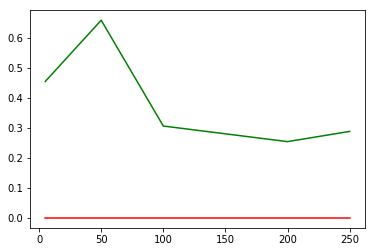

Working on... PEP
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3345724907063197
0.5427509293680297
--------------
0.5018587360594795
0.5315985130111525
0.5315985130111525
0.5278810408921933
0.3

0.4721189591078067
0.5390334572490706
0.44981412639405205
0.516728624535316
--------------
0.5315985130111525
0.45724907063197023
0.4684014869888476
0.4944237918215613
0.4758364312267658
0.44609665427509293
--------------
0.516728624535316
0.48698884758364314
0.4795539033457249
0.4758364312267658
0.516728624535316
0.49814126394052044
--------------
0.49814126394052044
0.4721189591078067
0.5315985130111525
0.4721189591078067
0.6654275092936803
0.5464684014869888
--------------
0.49814126394052044
0.4684014869888476
0.5315985130111525
0.4721189591078067
0.6654275092936803
0.5427509293680297
--------------
0.49814126394052044
0.4684014869888476
0.5315985130111525
0.4721189591078067
0.6654275092936803
0.5427509293680297
--------------
0.49814126394052044
0.4684014869888476
0.5315985130111525
0.4721189591078067
0.6654275092936803
0.5427509293680297
--------------
0.5650557620817844
0.5018587360594795
0.4684014869888476
0.4944237918215613
0.4944237918215613
0.550185873605948
--------------
0

0.518796992481203
0.5413533834586466
0.6428571428571429
0.5939849624060151
0.19548872180451127
0.5714285714285714
--------------
0.518796992481203
0.5413533834586466
0.6616541353383458
0.5939849624060151
0.19548872180451127
0.5714285714285714
--------------
0.518796992481203
0.5413533834586466
0.6616541353383458
0.5939849624060151
0.19548872180451127
0.5714285714285714
--------------
0.518796992481203
0.5413533834586466
0.5375939849624061
0.5939849624060151
0.19548872180451127
0.5714285714285714
--------------
0.518796992481203
0.5413533834586466
0.3383458646616541
0.5939849624060151
0.19548872180451127
0.5714285714285714
--------------
0.48120300751879697
0.45864661654135336
0.7255639097744361
0.40601503759398494
0.8045112781954887
0.42857142857142855
--------------
0.48120300751879697
0.45864661654135336
0.7255639097744361
0.40601503759398494
0.8045112781954887
0.42857142857142855
--------------
0.48120300751879697
0.45864661654135336
0.7330827067669173
0.40601503759398494
0.80451127

0.45864661654135336
0.6616541353383458
0.5939849624060151
0.8045112781954887
0.5714285714285714
--------------
0.48120300751879697
0.45864661654135336
0.3383458646616541
0.5939849624060151
0.8045112781954887
0.5714285714285714
--------------
0.5037593984962406
0.3007518796992481
0.40977443609022557
0.49624060150375937
0.4323308270676692
0.6842105263157895
--------------
0.4849624060150376
0.3609022556390977
0.39097744360902253
0.4924812030075188
0.4323308270676692
0.6654135338345865
--------------
0.462406015037594
0.3533834586466165
0.5375939849624061
0.49624060150375937
0.34210526315789475
0.5451127819548872
--------------
0.4398496240601504
0.3684210526315789
0.6578947368421053
0.47368421052631576
0.3458646616541353
0.4924812030075188
--------------
0.4323308270676692
0.44360902255639095
0.6578947368421053
0.4774436090225564
0.37969924812030076
0.46616541353383456
--------------
0.4849624060150376
0.41729323308270677
0.6203007518796992
0.4548872180451128
0.40601503759398494
0.526315

0.5534351145038168
0.366412213740458
0.3893129770992366
0.8625954198473282
0.1946564885496183
--------------
0.3969465648854962
0.33969465648854963
0.41603053435114506
0.6717557251908397
0.6526717557251909
0.5954198473282443
--------------
0.4732824427480916
0.2786259541984733
0.3893129770992366
0.41603053435114506
0.21755725190839695
0.366412213740458
--------------
0.44656488549618323
0.2480916030534351
0.3702290076335878
0.3511450381679389
0.14122137404580154
0.4122137404580153
--------------
0.41603053435114506
0.3244274809160305
0.4732824427480916
0.4083969465648855
0.30916030534351147
0.648854961832061
--------------
0.5114503816793893
0.37404580152671757
0.6183206106870229
0.48091603053435117
0.5
0.7404580152671756
--------------
0.549618320610687
0.44656488549618323
0.6335877862595419
0.6106870229007634
0.8625954198473282
0.8053435114503816
--------------
0.549618320610687
0.44656488549618323
0.6335877862595419
0.6106870229007634
0.8625954198473282
0.8053435114503816
----------

0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.48031496062992124
0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.48031496062992124
0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.48031496062992124
0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.48031496062992124
0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.48031496062992124
0.5393700787401575
0.6614173228346457
0.3858267716535433
1.0
0.01968503937007874
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.3858267716535433
0.0
0.9803149606299213
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.3858267716535433
0.0
0.9803149606299213
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.3858267716535433
0.0
0.98031496062

0.2677165354330709
0.5393700787401575
0.1377952755905512
0.6889763779527559
--------------
0.47244094488188976
0.43700787401574803
0.2755905511811024
0.5
0.25196850393700787
0.515748031496063
--------------
0.49606299212598426
0.47244094488188976
0.3937007874015748
0.484251968503937
0.5393700787401575
0.8543307086614174
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.6141732283464567
1.0
0.9803149606299213
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.6141732283464567
1.0
0.9803149606299213
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.6141732283464567
1.0
0.9803149606299213
--------------
0.5196850393700787
0.46062992125984253
0.6614173228346457
0.6141732283464567
1.0
0.9803149606299213
--------------
0.48031496062992124
0.48031496062992124
0.33858267716535434
0.468503937007874
0.0
0.01968503937007874
--------------
0.48031496062992124
0.468503937007874
0.33858267716535434
0.4645669291338583
0.0
0.019

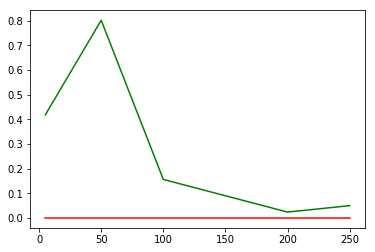

Working on... GOOGL
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.5162689804772235
0.5488069414316703
0.49023861171366595
--------------
0.5292841648590022
0.5184381778741866
0.45336225596529284
0.516

0.4772234273318872
0.41431670281995664
0.5054229934924078
0.5314533622559653
0.4772234273318872
0.45770065075921906
--------------
0.5249457700650759
0.44685466377440347
0.4793926247288503
0.5336225596529284
0.4880694143167028
0.5249457700650759
--------------
0.5097613882863341
0.4511930585683297
0.4511930585683297
0.5075921908893709
0.5140997830802603
0.45770065075921906
--------------
0.5140997830802603
0.5140997830802603
0.527114967462039
0.5184381778741866
0.5466377440347071
0.5119305856832972
--------------
0.5292841648590022
0.5184381778741866
0.5466377440347071
0.5162689804772235
0.5488069414316703
0.5097613882863341
--------------
0.5292841648590022
0.5184381778741866
0.5466377440347071
0.5162689804772235
0.5488069414316703
0.5097613882863341
--------------
0.5292841648590022
0.5184381778741866
0.5466377440347071
0.5162689804772235
0.5488069414316703
0.5097613882863341
--------------
0.5314533622559653
0.47071583514099785
0.43383947939262474
0.527114967462039
0.553145336225596

0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.5502183406113537
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.4497816593886463
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.4497816593886463
0.3624454148471616
--------------
0.3384279475982533
0.4847161572052402
0.6135

0.6615720524017468
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.4497816593886463
0.6375545851528385
--------------
0.6615720524017468
0.4847161572052402
0.6135371179039302
0.5786026200873362
0.4497816593886463
0.6375545851528385
--------------
0.4585152838427948
0.4868995633187773
0.47161572052401746
0.6048034934497817
0.5436681222707423
0.6331877729257642
--------------
0.4868995633187773
0.48034934497816595
0.4978165938864629
0.611353711790393
0.5938864628820961
0.6462882096069869
--------------
0.5087336244541485
0.44759825327510916
0.4847161572052402
0.6397379912663755
0.5655021834061136
0.6572052401746725
--------------
0.574235807860262
0.4585152838427948
0.48034934497816595
0.6441048034934498
0.5589519650655022
0.6506550218340611
--------------
0.574235807860262
0.48034934497816595
0.4606986899563319
0.6462882096069869
0.5655021834061136
0.6397379912663755
--------------
0.5676855895196506
0.44759825327510916
0.4388646288209607
0.5262008733624454
0.5283842794759825

0.6167400881057269
0.7004405286343612
0.4118942731277533
0.3766519823788546
0.33480176211453744
--------------
0.36123348017621143
0.3832599118942731
0.7004405286343612
0.5881057268722467
0.6233480176211453
0.33480176211453744
--------------
0.5176211453744494
0.4118942731277533
0.43612334801762115
0.4008810572687225
0.5066079295154186
0.6674008810572687
--------------
0.47577092511013214
0.40969162995594716
0.34140969162995594
0.40748898678414097
0.5947136563876652
0.711453744493392
--------------
0.5110132158590308
0.4185022026431718
0.31497797356828194
0.7466960352422908
0.6563876651982379
0.6806167400881057
--------------
0.4933920704845815
0.42951541850220265
0.539647577092511
0.711453744493392
0.7466960352422908
0.6828193832599119
--------------
0.5220264317180616
0.4669603524229075
0.5440528634361234
0.6321585903083701
0.6255506607929515
0.6629955947136564
--------------
0.6189427312775331
0.6189427312775331
0.7004405286343612
0.5881057268722467
0.3766519823788546
0.665198237885

0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515695067264574
0.2040358744394619
0.6838565022421524
0.4551569506726457
0.6098654708520179
0.6367713004484304
--------------
0.5515

0.7286995515695067
0.5269058295964125
0.5874439461883408
0.5896860986547086
0.5246636771300448
0.6771300448430493
--------------
0.547085201793722
0.7914798206278026
0.6838565022421524
0.5448430493273543
0.3901345291479821
0.6367713004484304
--------------
0.5515695067264574
0.7959641255605381
0.6838565022421524
0.5448430493273543
0.3901345291479821
0.6367713004484304
--------------
0.5515695067264574
0.7959641255605381
0.6838565022421524
0.5448430493273543
0.3901345291479821
0.6367713004484304
--------------
0.5515695067264574
0.7959641255605381
0.6838565022421524
0.5448430493273543
0.3901345291479821
0.6367713004484304
--------------
0.7533632286995515
0.22869955156950672
0.3789237668161435
0.6121076233183856
0.7354260089686099
0.6502242152466368
--------------
0.8139013452914798
0.226457399103139
0.34977578475336324
0.6076233183856502
0.7466367713004485
0.6412556053811659
--------------
0.804932735426009
0.30269058295964124
0.38565022421524664
0.6614349775784754
0.6614349775784754
0

0.3665158371040724
0.49095022624434387
0.5384615384615384
0.583710407239819
--------------
0.497737556561086
0.8280542986425339
0.3665158371040724
0.49095022624434387
0.5384615384615384
0.583710407239819
--------------
0.497737556561086
0.8280542986425339
0.3665158371040724
0.49095022624434387
0.5384615384615384
0.583710407239819
--------------
0.502262443438914
0.8280542986425339
0.3665158371040724
0.5090497737556561
0.5384615384615384
0.416289592760181
--------------
0.502262443438914
0.8280542986425339
0.502262443438914
0.5248868778280543
0.5678733031674208
0.5113122171945701
--------------
0.5927601809954751
0.6221719457013575
0.5927601809954751
0.5542986425339367
0.6018099547511312
0.5361990950226244
--------------
0.6266968325791855
0.5972850678733032
0.5927601809954751
0.5701357466063348
0.6900452488687783
0.6040723981900452
--------------
0.6561085972850679
0.3054298642533937
0.5588235294117647
0.6425339366515838
0.6877828054298643
0.6493212669683258
--------------
0.6447963800

F1,score 0.5681255161023947
Accuracy: 0.5262681159420289
[0, 0, 0, 0, 0]
[0.5134431916738942, 0.6075174825174825, 0.5079365079365079, 0.4748653500897666, 0.5262681159420289]
accuracy
accuracy


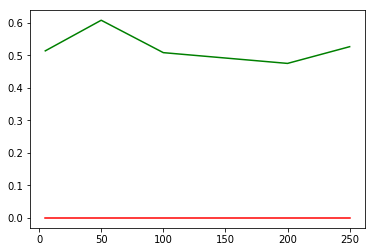

Working on... MSFT
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.44685466377440347
0.44685466377440347
0.4685466377440347
0.47071583514099785
--------------
0.4793926247288503
0.49023861171366595
0.446854663

0.5075921908893709
--------------
0.5683297180043384
0.5379609544468547
0.5054229934924078
0.4793926247288503
0.5140997830802603
0.5032537960954447
--------------
0.5292841648590022
0.5140997830802603
0.4685466377440347
0.48156182212581344
0.5140997830802603
0.5336225596529284
--------------
0.5422993492407809
0.4880694143167028
0.4793926247288503
0.544468546637744
0.5140997830802603
0.5162689804772235
--------------
0.5119305856832972
0.5032537960954447
0.5553145336225597
0.5531453362255966
0.527114967462039
0.527114967462039
--------------
0.5206073752711496
0.5097613882863341
0.5531453362255966
0.5531453362255966
0.5314533622559653
0.5292841648590022
--------------
0.5206073752711496
0.5097613882863341
0.5531453362255966
0.5531453362255966
0.5314533622559653
0.5292841648590022
--------------
0.5206073752711496
0.5097613882863341
0.5531453362255966
0.5531453362255966
0.5314533622559653
0.5292841648590022
--------------
0.5509761388286334
0.5162689804772235
0.4945770065075922
0.492407

0.4890829694323144
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.5917030567685589
0.6877729257641921
0.4039301310043668
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.5917030567685589
0.6877729257641921
0.4039301310043668
0.4847161572052402
0.3930131004366812
--------------
0.6397379912663755
0.5829694323144105
0.6877729257641921
0.4104

0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.6069868995633187
--------------
0.6397379912663755
0.6593886462882096
0.6877729257641921
0.5960698689956332
0.4847161572052402
0.6069868995633187
--------------
0.37336244541484714
0.4410480349344978
0.36899563318777295
0.4192139737991266
0.5545851528384279
0.4847161572052402
--------------
0.3951965065502183
0.4759825327510917
0.3777292576419214
0.4192139737991266
0.5589519650655022
0.4978165938864629
--------------
0.462882096069869
0.4519650655021834
0.34497816593886466
0.3624454148471616
0.4890829694323144
0.48034934497816595
--------------
0.5327510917030568
0.4344978165938865
0.3777292576419214
0.3624454148471616
0.4519650655021834
0.5
--------------
0.5982532751091703
0.45414847161572053
0.36026200873362446
0.4912663755458515
0.5218340611353712
0.5720524017467249
--------------
0.6048034934497817
0.45633187772925765
0.39956331877729256
0.5043668122270742
0.5764192139737991
0.5655021834061136
----------

0.3898678414096916
0.6189427312775331
0.2621145374449339
--------------
0.4669603524229075
0.44713656387665196
0.40969162995594716
0.48237885462555063
0.5330396475770925
0.2621145374449339
--------------
0.3722466960352423
0.3766519823788546
0.2533039647577093
0.3700440528634361
0.5947136563876652
0.2621145374449339
--------------
0.34140969162995594
0.3854625550660793
0.2422907488986784
0.3788546255506608
0.5682819383259912
0.2621145374449339
--------------
0.486784140969163
0.41409691629955947
0.2577092511013216
0.3722466960352423
0.41409691629955947
0.45594713656387664
--------------
0.5616740088105727
0.35462555066079293
0.46255506607929514
0.4933920704845815
0.473568281938326
0.6762114537444934
--------------
0.7577092511013216
0.6806167400881057
0.7599118942731278
0.6101321585903083
0.381057268722467
0.737885462555066
--------------
0.7555066079295154
0.6784140969162996
0.7599118942731278
0.6101321585903083
0.381057268722467
0.737885462555066
--------------
0.7555066079295154
0.6

0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.4551569506726457
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.3609865470852018
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.3251121076233184
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.6748878923766816
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.6748878923766816
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.6748878923766816
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.2645739910313901
0.6748878923766816
0.4013452914798206
0.2757847533632287
--------------
0.2713004484304933
0.226457399103139
0.7354260089686099
0.325112107623

0.6748878923766816
0.4013452914798206
0.7242152466367713
--------------
0.7286995515695067
0.773542600896861
0.7354260089686099
0.6748878923766816
0.4013452914798206
0.7242152466367713
--------------
0.7286995515695067
0.773542600896861
0.7354260089686099
0.6748878923766816
0.4013452914798206
0.7242152466367713
--------------
0.7286995515695067
0.773542600896861
0.7354260089686099
0.6748878923766816
0.4013452914798206
0.7242152466367713
--------------
0.27802690582959644
0.2242152466367713
0.27802690582959644
0.4439461883408072
0.6457399103139013
0.6569506726457399
--------------
0.35201793721973096
0.2982062780269058
0.2533632286995516
0.5201793721973094
0.672645739910314
0.6748878923766816
--------------
0.3811659192825112
0.3116591928251121
0.24439461883408073
0.5134529147982063
0.6210762331838565
0.773542600896861
--------------
0.4484304932735426
0.2825112107623318
0.2713004484304933
0.5224215246636771
0.5224215246636771
0.8565022421524664
--------------
0.4663677130044843
0.30717

0.18099547511312217
0.7330316742081447
0.7036199095022625
0.48868778280542985
0.7081447963800905
--------------
0.7963800904977375
0.18099547511312217
0.7330316742081447
0.7036199095022625
0.48868778280542985
0.7081447963800905
--------------
0.20361990950226244
0.18099547511312217
0.2669683257918552
0.7036199095022625
0.48868778280542985
0.7081447963800905
--------------
0.20361990950226244
0.18099547511312217
0.2669683257918552
0.7036199095022625
0.48868778280542985
0.7081447963800905
--------------
0.26244343891402716
0.5271493212669683
0.6199095022624435
0.5135746606334841
0.5972850678733032
0.4592760180995475
--------------
0.22624434389140272
0.2873303167420814
0.4072398190045249
0.4796380090497738
0.5950226244343891
0.5972850678733032
--------------
0.21945701357466063
0.2895927601809955
0.40271493212669685
0.416289592760181
0.6289592760180995
0.7126696832579186
--------------
0.26244343891402716
0.4072398190045249
0.416289592760181
0.34615384615384615
0.5927601809954751
0.68552

F1,score 0.0
Accuracy: 0.232579185520362
[0, 0, 0, 0, 0]
[0.5424610051993067, 0.5353711790393013, 0.6044052863436123, 0.6852017937219731, 0.232579185520362]
accuracy
accuracy


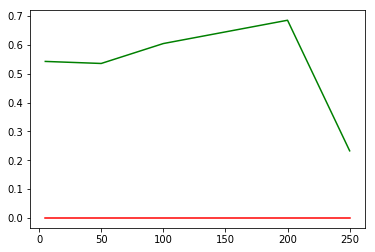

Working on... FB
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.5206073752711496
0.44251626898047725
0.4880694143167028
0.490238

0.5140997830802603
0.5357917570498916
0.5206073752711496
0.48156182212581344
0.48590021691973967
0.5531453362255966
--------------
0.45770065075921906
0.5054229934924078
0.46203904555314534
0.4685466377440347
0.5357917570498916
0.5075921908893709
--------------
0.5184381778741866
0.5357917570498916
0.5401301518438177
0.49023861171366595
0.5553145336225597
0.5054229934924078
--------------
0.49891540130151846
0.6052060737527115
0.48156182212581344
0.5075921908893709
0.5184381778741866
0.5357917570498916
--------------
0.4793926247288503
0.5574837310195228
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.4793926247288503
0.5574837310195228
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.4793926247288503
0.5574837310195228
0.4880694143167028
0.49023861171366595
0.5075921908893709
0.5162689804772235
--------------
0.49891540130151846
0.5054229934924078
0.5379609544468547
0.4880694143167028
0.46854663

0.5283842794759825
0.5109170305676856
0.48034934497816595
0.3951965065502183
--------------
0.42139737991266374
0.5567685589519651
0.5283842794759825
0.5109170305676856
0.48034934497816595
0.39737991266375544
--------------
0.42139737991266374
0.5567685589519651
0.5283842794759825
0.5109170305676856
0.48034934497816595
0.39737991266375544
--------------
0.42139737991266374
0.5567685589519651
0.5283842794759825
0.5109170305676856
0.48034934497816595
0.39737991266375544
--------------
0.42139737991266374
0.5567685589519651
0.5283842794759825
0.5109170305676856
0.48034934497816595
0.39737991266375544
--------------
0.42139737991266374
0.5567685589519651
0.5283842794759825
0.5109170305676856
0.48034934497816595
0.39737991266375544
--------------
0.42139737991266374
0.4432314410480349
0.47161572052401746
0.5109170305676856
0.519650655021834
0.6026200873362445
--------------
0.42139737991266374
0.4432314410480349
0.47161572052401746
0.5109170305676856
0.519650655021834
0.6026200873362445
---

0.519650655021834
0.6026200873362445
--------------
0.5786026200873362
0.5567685589519651
0.5283842794759825
0.4890829694323144
0.519650655021834
0.6026200873362445
--------------
0.5786026200873362
0.5567685589519651
0.5283842794759825
0.4890829694323144
0.519650655021834
0.6026200873362445
--------------
0.45414847161572053
0.4432314410480349
0.6135371179039302
0.5240174672489083
0.519650655021834
0.611353711790393
--------------
0.4606986899563319
0.43013100436681223
0.6200873362445415
0.537117903930131
0.5436681222707423
0.6026200873362445
--------------
0.5087336244541485
0.47161572052401746
0.6572052401746725
0.5698689956331878
0.5960698689956332
0.6506550218340611
--------------
0.49563318777292575
0.5480349344978166
0.5087336244541485
0.4847161572052402
0.5873362445414847
0.6353711790393013
--------------
0.4781659388646288
0.5589519650655022
0.519650655021834
0.43231441048034935
0.6004366812227074
0.4890829694323144
--------------
0.48253275109170307
0.5414847161572053
0.45633

0.2511013215859031
--------------
0.5638766519823789
0.36123348017621143
0.5991189427312775
0.4801762114537445
0.6519823788546255
0.2511013215859031
--------------
0.5110132158590308
0.4647577092511013
0.5198237885462555
0.5
0.5748898678414097
0.46916299559471364
--------------
0.5594713656387665
0.45374449339207046
0.5418502202643172
0.526431718061674
0.5176211453744494
0.7555066079295154
--------------
0.5748898678414097
0.43392070484581496
0.5484581497797357
0.6057268722466961
0.5484581497797357
0.751101321585903
--------------
0.5462555066079295
0.4052863436123348
0.5088105726872246
0.5748898678414097
0.5154185022026432
0.7422907488986784
--------------
0.4801762114537445
0.44273127753303965
0.5462555066079295
0.5242290748898678
0.5616740088105727
0.6916299559471366
--------------
0.5440528634361234
0.6453744493392071
0.5947136563876652
0.5242290748898678
0.3656387665198238
0.7422907488986784
--------------
0.5638766519823789
0.6387665198237885
0.5991189427312775
0.5198237885462555

0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.5560538116591929
0.5269058295964125
0.6367713004484304
0.2982062780269058
--------------
0.5605381165919282
0.48654708520179374
0.556053811659192

0.5112107623318386
0.6547085201793722
0.4798206278026906
0.6704035874439462
0.6905829596412556
--------------
0.4551569506726457
0.4663677130044843
0.5627802690582959
0.47757847533632286
0.42152466367713004
0.7017937219730942
--------------
0.43946188340807174
0.48654708520179374
0.5560538116591929
0.4730941704035874
0.3632286995515695
0.7017937219730942
--------------
0.43946188340807174
0.48654708520179374
0.5560538116591929
0.4730941704035874
0.3632286995515695
0.7017937219730942
--------------
0.43946188340807174
0.48654708520179374
0.5560538116591929
0.4730941704035874
0.3632286995515695
0.7017937219730942
--------------
0.7869955156950673
0.5201793721973094
0.594170403587444
0.6367713004484304
0.7466367713004485
0.7017937219730942
--------------
0.8340807174887892
0.5134529147982063
0.5582959641255605
0.6390134529147982
0.7668161434977578
0.7017937219730942
--------------
0.8116591928251121
0.5381165919282511
0.5852017937219731
0.5986547085201793
0.757847533632287
0.7017937219730

0.6040723981900452
0.4230769230769231
0.6470588235294118
--------------
0.38235294117647056
0.42081447963800905
0.5067873303167421
0.6040723981900452
0.4230769230769231
0.6470588235294118
--------------
0.38235294117647056
0.42081447963800905
0.5067873303167421
0.6040723981900452
0.4230769230769231
0.6470588235294118
--------------
0.38235294117647056
0.42081447963800905
0.5067873303167421
0.6040723981900452
0.4230769230769231
0.6470588235294118
--------------
0.38235294117647056
0.42081447963800905
0.5067873303167421
0.6040723981900452
0.4230769230769231
0.6470588235294118
--------------
0.38235294117647056
0.42081447963800905
0.5067873303167421
0.6153846153846154
0.4230769230769231
0.6515837104072398
--------------
0.5656108597285068
0.6583710407239819
0.6063348416289592
0.5497737556561086
0.6289592760180995
0.6583710407239819
--------------
0.7194570135746606
0.7036199095022625
0.6923076923076923
0.6447963800904978
0.6900452488687783
0.6832579185520362
--------------
0.7443438914027

Window: 250
[[ 80  24]
 [621 380]]
Vol pos 5.389250123551622
Vol neg 3.147564116208494
F1,score 0.5409252669039146
Accuracy: 0.416289592760181
[0, 0, 0, 0, 0]
[0.5589254766031195, 0.5781659388646289, 0.7400881057268722, 0.4717488789237668, 0.416289592760181]
accuracy
accuracy


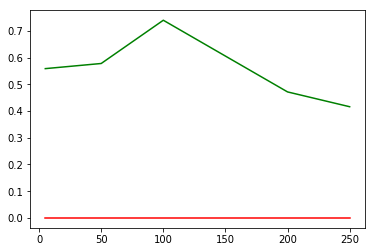

Working on... INTC
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.4598698481561822
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.45986984815

--------------
0.5683297180043384
0.5206073752711496
0.5466377440347071
0.5140997830802603
0.455531453362256
0.5206073752711496
--------------
0.6095444685466378
0.4772234273318872
0.527114967462039
0.5075921908893709
0.5140997830802603
0.5813449023861171
--------------
0.561822125813449
0.47288503253796094
0.5401301518438177
0.5054229934924078
0.4967462039045553
0.5553145336225597
--------------
0.4967462039045553
0.5097613882863341
0.4924078091106291
0.5314533622559653
0.5422993492407809
0.5206073752711496
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.5401301518438177
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.5401301518438177
0.5466377440347071
0.5227765726681128
--------------
0.49023861171366595
0.5075921908893709
0.5032537960954447
0.5401301518438177
0.5466377440347071
0.5227765726681128
--------------
0.5336225596529284
0.45770065075921906
0.49891540130151846
0.49891540130151846
0.

--------------
0.3799126637554585
0.5131004366812227
0.5393013100436681
0.62882096069869
0.39956331877729256
0.5676855895196506
--------------
0.3799126637554585
0.5131004366812227
0.5393013100436681
0.62882096069869
0.39956331877729256
0.5676855895196506
--------------
0.3799126637554585
0.5131004366812227
0.5393013100436681
0.62882096069869
0.39956331877729256
0.5676855895196506
--------------
0.3799126637554585
0.5131004366812227
0.5393013100436681
0.62882096069869
0.39956331877729256
0.5676855895196506
--------------
0.3799126637554585
0.5131004366812227
0.5393013100436681
0.62882096069869
0.39956331877729256
0.5676855895196506
--------------
0.3799126637554585
0.4868995633187773
0.4606986899563319
0.37117903930131
0.6004366812227074
0.5676855895196506
--------------
0.3799126637554585
0.4868995633187773
0.4606986899563319
0.37117903930131
0.6004366812227074
0.5676855895196506
--------------
0.3799126637554585
0.4868995633187773
0.4606986899563319
0.37117903930131
0.600436681222707

0.5676855895196506
--------------
0.3799126637554585
0.4868995633187773
0.5393013100436681
0.62882096069869
0.6004366812227074
0.5676855895196506
--------------
0.6004366812227074
0.5807860262008734
0.519650655021834
0.3930131004366812
0.4017467248908297
0.5043668122270742
--------------
0.5829694323144105
0.5458515283842795
0.5807860262008734
0.43013100436681223
0.39737991266375544
0.5109170305676856
--------------
0.5327510917030568
0.5065502183406113
0.6026200873362445
0.4344978165938865
0.3951965065502183
0.4912663755458515
--------------
0.5131004366812227
0.4672489082969432
0.6026200873362445
0.48034934497816595
0.4170305676855895
0.5021834061135371
--------------
0.48034934497816595
0.48253275109170307
0.5917030567685589
0.5524017467248908
0.4126637554585153
0.5043668122270742
--------------
0.49563318777292575
0.517467248908297
0.48253275109170307
0.4672489082969432
0.425764192139738
0.5414847161572053
--------------
0.38427947598253276
0.4781659388646288
0.5262008733624454
0.6

0.33480176211453744
0.6299559471365639
0.6607929515418502
0.6696035242290749
0.3303964757709251
0.5638766519823789
--------------
0.5925110132158591
0.6872246696035242
0.44273127753303965
0.33259911894273125
0.3303964757709251
0.41409691629955947
--------------
0.6519823788546255
0.711453744493392
0.44052863436123346
0.31718061674008813
0.3303964757709251
0.4251101321585903
--------------
0.6563876651982379
0.7202643171806168
0.43392070484581496
0.31718061674008813
0.3303964757709251
0.40748898678414097
--------------
0.6519823788546255
0.7334801762114538
0.4581497797356828
0.3700440528634361
0.3370044052863436
0.4933920704845815
--------------
0.5330396475770925
0.6696035242290749
0.4933920704845815
0.44493392070484583
0.3436123348017621
0.5308370044052864
--------------
0.3303964757709251
0.3832599118942731
0.6123348017621145
0.6762114537444934
0.6696035242290749
0.5859030837004405
--------------
0.33480176211453744
0.3700440528634361
0.6343612334801763
0.6828193832599119
0.669603524

0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
--------------
0.2713004484304933
0.6143497757847534
0.2982062780269058
0.7219730941704036
0.6659192825112108
0.40358744394618834
-------------

0.773542600896861
0.5112107623318386
0.34977578475336324
0.452914798206278
0.6614349775784754
--------------
0.757847533632287
0.7085201793721974
0.5582959641255605
0.3901345291479821
0.4551569506726457
0.6704035874439462
--------------
0.2713004484304933
0.39461883408071746
0.6905829596412556
0.7219730941704036
0.6659192825112108
0.5964125560538116
--------------
0.2713004484304933
0.38565022421524664
0.7017937219730942
0.7219730941704036
0.6659192825112108
0.5964125560538116
--------------
0.2713004484304933
0.38565022421524664
0.7017937219730942
0.7219730941704036
0.6659192825112108
0.5964125560538116
--------------
0.2713004484304933
0.38565022421524664
0.7017937219730942
0.7219730941704036
0.6659192825112108
0.5964125560538116
--------------
0.7286995515695067
0.6928251121076233
0.40358744394618834
0.2825112107623318
0.3430493273542601
0.4977578475336323
--------------
0.7242152466367713
0.6636771300448431
0.3273542600896861
0.28475336322869954
0.3430493273542601
0.565022421524663

0.748868778280543
0.3031674208144796
0.6945701357466063
0.4457013574660634
--------------
0.2873303167420814
0.6108597285067874
0.748868778280543
0.3031674208144796
0.6945701357466063
0.4457013574660634
--------------
0.2873303167420814
0.6108597285067874
0.748868778280543
0.3031674208144796
0.6945701357466063
0.4457013574660634
--------------
0.2873303167420814
0.6108597285067874
0.748868778280543
0.3031674208144796
0.6945701357466063
0.4457013574660634
--------------
0.7126696832579186
0.6108597285067874
0.748868778280543
0.3031674208144796
0.6945701357466063
0.5542986425339367
--------------
0.7126696832579186
0.6108597285067874
0.6719457013574661
0.3031674208144796
0.4796380090497738
0.49321266968325794
--------------
0.7126696832579186
0.6131221719457014
0.251131221719457
0.3031674208144796
0.3054298642533937
0.4457013574660634
--------------
0.7126696832579186
0.6108597285067874
0.3054298642533937
0.3031674208144796
0.3054298642533937
0.5203619909502263
--------------
0.714932126

Window: 250
[[269  79]
 [517 240]]
Vol pos 2.853009103730271
Vol neg 2.546323287812179
F1,score 0.446096654275093
Accuracy: 0.4606334841628959
[0, 0, 0, 0, 0]
[0.48180242634315423, 0.548471615720524, 0.5814977973568282, 0.4179372197309417, 0.4606334841628959]
accuracy
accuracy


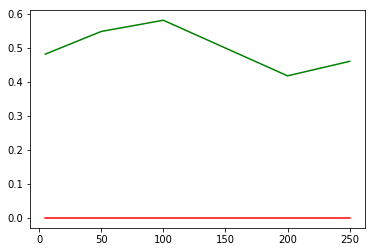

Working on... CSCO
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.5488069414316703
0.4924078091106291
0.4772234273318872
--------------
0.5683297180043384
0.4403470715835141
0.45770065075921906
0.54880694143

0.49023861171366595
0.5054229934924078
0.4642082429501085
0.544468546637744
0.5075921908893709
--------------
0.5075921908893709
0.5488069414316703
0.4642082429501085
0.48156182212581344
0.49023861171366595
0.5227765726681128
--------------
0.4924078091106291
0.4945770065075922
0.4750542299349241
0.4772234273318872
0.5032537960954447
0.5140997830802603
--------------
0.5683297180043384
0.5509761388286334
0.5422993492407809
0.544468546637744
0.5054229934924078
0.5206073752711496
--------------
0.5683297180043384
0.559652928416486
0.5422993492407809
0.5488069414316703
0.5075921908893709
0.5227765726681128
--------------
0.5683297180043384
0.559652928416486
0.5422993492407809
0.5488069414316703
0.5075921908893709
0.5227765726681128
--------------
0.5683297180043384
0.559652928416486
0.5422993492407809
0.5488069414316703
0.5075921908893709
0.5227765726681128
--------------
0.5097613882863341
0.5075921908893709
0.4403470715835141
0.4164859002169197
0.5314533622559653
0.48156182212581344
---

--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.40829694323144106
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.40829694323144106
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.40829694323144106
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.40829694323144106
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.40829694323144106
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.5917030567685589
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.5917030567685589
0.574235807860262
0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.36899563318777295
0.5917030567685589


0.5982532751091703
--------------
0.7008733624454149
0.7292576419213974
0.631004366812227
0.5917030567685589
0.425764192139738
0.5982532751091703
--------------
0.29912663755458513
0.5349344978165939
0.5589519650655022
0.38209606986899564
0.611353711790393
0.4388646288209607
--------------
0.29912663755458513
0.4978165938864629
0.5480349344978166
0.40611353711790393
0.6157205240174672
0.4585152838427948
--------------
0.3034934497816594
0.6506550218340611
0.5611353711790393
0.31222707423580787
0.5633187772925764
0.4606986899563319
--------------
0.3165938864628821
0.6637554585152838
0.5589519650655022
0.42358078602620086
0.6222707423580786
0.5109170305676856
--------------
0.3799126637554585
0.6419213973799127
0.5109170305676856
0.4344978165938865
0.6397379912663755
0.4912663755458515
--------------
0.4606986899563319
0.6419213973799127
0.5349344978165939
0.6331877729257642
0.6462882096069869
0.4781659388646288
--------------
0.7008733624454149
0.7292576419213974
0.62882096069869
0.591

--------------
0.3898678414096916
0.45374449339207046
0.43171806167400884
0.5198237885462555
0.44933920704845814
0.3876651982378855
--------------
0.2577092511013216
0.460352422907489
0.4801762114537445
0.5374449339207048
0.5
0.3766519823788546
--------------
0.16740088105726872
0.4845814977973568
0.5242290748898678
0.31277533039647576
0.5616740088105727
0.486784140969163
--------------
0.17841409691629956
0.762114537444934
0.6321585903083701
0.3524229074889868
0.6123348017621145
0.6145374449339207
--------------
0.3303964757709251
0.7951541850220264
0.6189427312775331
0.5242290748898678
0.3986784140969163
0.5154185022026432
--------------
0.8325991189427313
0.8193832599118943
0.6475770925110133
0.6057268722466961
0.3832599118942731
0.6123348017621145
--------------
0.8325991189427313
0.8171806167400881
0.6475770925110133
0.6057268722466961
0.3832599118942731
0.6123348017621145
--------------
0.8325991189427313
0.8171806167400881
0.6475770925110133
0.6057268722466961
0.3832599118942731

--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.28699551569506726
0.4327354260089686
0.4147982062780269
--------------
0.05829596412556054
0.9551569506726457
0.3452914798206278
0.71300448

0.9551569506726457
0.6547085201793722
0.7130044843049327
0.4327354260089686
0.5852017937219731
--------------
0.9417040358744395
0.9551569506726457
0.6547085201793722
0.7130044843049327
0.4327354260089686
0.5852017937219731
--------------
0.9417040358744395
0.9551569506726457
0.6547085201793722
0.7130044843049327
0.4327354260089686
0.5852017937219731
--------------
0.9417040358744395
0.9551569506726457
0.6547085201793722
0.7130044843049327
0.4327354260089686
0.5852017937219731
--------------
0.06053811659192825
0.6860986547085202
0.6322869955156951
0.5269058295964125
0.5874439461883408
0.7331838565022422
--------------
0.05829596412556054
0.5538116591928252
0.6322869955156951
0.47085201793721976
0.5605381165919282
0.7668161434977578
--------------
0.07847533632286996
0.7040358744394619
0.6547085201793722
0.4170403587443946
0.5224215246636771
0.827354260089686
--------------
0.17713004484304934
0.9551569506726457
0.6547085201793722
0.5269058295964125
0.5986547085201793
0.786995515695067

0.5950226244343891
0.6787330316742082
--------------
0.25339366515837103
0.8416289592760181
0.669683257918552
0.6515837104072398
0.6515837104072398
0.7126696832579186
--------------
0.05656108597285068
0.8461538461538461
0.669683257918552
0.5588235294117647
0.47058823529411764
0.8122171945701357
--------------
0.31221719457013575
0.9932126696832579
0.669683257918552
0.6515837104072398
0.6402714932126696
0.7692307692307693
--------------
0.997737556561086
0.9932126696832579
0.669683257918552
0.753393665158371
0.5588235294117647
0.5407239819004525
--------------
1.0
0.9932126696832579
0.669683257918552
0.753393665158371
0.5588235294117647
0.5407239819004525
--------------
1.0
0.9932126696832579
0.669683257918552
0.753393665158371
0.5588235294117647
0.5407239819004525
--------------
1.0
0.9932126696832579
0.669683257918552
0.753393665158371
0.5588235294117647
0.5407239819004525
--------------
1.0
0.9932126696832579
0.669683257918552
0.2873303167420814
0.5180995475113123
0.5203619909502263

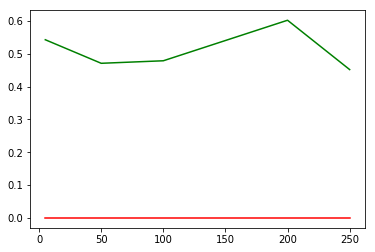

Working on... CMCSA
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605206073753
0.5010845986984815
--------------
0.527114967462039
0.4490238611713666
0.5292841648590022
0.4793926247288503
0.5661605

0.5748373101952278
0.45770065075921906
0.5292841648590022
0.45336225596529284
--------------
0.4880694143167028
0.527114967462039
0.5835140997830802
0.5032537960954447
0.47071583514099785
0.4598698481561822
--------------
0.48590021691973967
0.5140997830802603
0.5379609544468547
0.5119305856832972
0.4490238611713666
0.47288503253796094
--------------
0.5422993492407809
0.4598698481561822
0.4945770065075922
0.4967462039045553
0.43817787418655096
0.48590021691973967
--------------
0.527114967462039
0.4490238611713666
0.47071583514099785
0.5206073752711496
0.43383947939262474
0.49891540130151846
--------------
0.527114967462039
0.4490238611713666
0.47071583514099785
0.5206073752711496
0.43383947939262474
0.49891540130151846
--------------
0.527114967462039
0.4490238611713666
0.47071583514099785
0.5206073752711496
0.43383947939262474
0.49891540130151846
--------------
0.49023861171366595
0.5357917570498916
0.5574837310195228
0.47071583514099785
0.5401301518438177
0.5292841648590022
-------

0.5633187772925764
0.5414847161572053
0.4432314410480349
0.6048034934497817
0.314410480349345
0.5109170305676856
--------------
0.5633187772925764
0.5414847161572053
0.4432314410480349
0.6048034934497817
0.314410480349345
0.5109170305676856
--------------
0.5633187772925764
0.5414847161572053
0.4432314410480349
0.6048034934497817
0.314410480349345
0.5109170305676856
--------------
0.5633187772925764
0.5414847161572053
0.4432314410480349
0.6048034934497817
0.314410480349345
0.5109170305676856
--------------
0.5633187772925764
0.5414847161572053
0.4432314410480349
0.6048034934497817
0.314410480349345
0.5109170305676856
--------------
0.5633187772925764
0.5414847161572053
0.5567685589519651
0.6048034934497817
0.314410480349345
0.4890829694323144
--------------
0.5633187772925764
0.5414847161572053
0.5567685589519651
0.6048034934497817
0.314410480349345
0.4890829694323144
--------------
0.5633187772925764
0.5414847161572053
0.5567685589519651
0.6048034934497817
0.314410480349345
0.48908296

0.4890829694323144
--------------
0.4366812227074236
0.4585152838427948
0.4432314410480349
0.6048034934497817
0.6855895196506551
0.4890829694323144
--------------
0.5458515283842795
0.517467248908297
0.574235807860262
0.5873362445414847
0.3777292576419214
0.5611353711790393
--------------
0.5414847161572053
0.5218340611353712
0.6004366812227074
0.5698689956331878
0.3930131004366812
0.5655021834061136
--------------
0.43013100436681223
0.5436681222707423
0.6026200873362445
0.5480349344978166
0.4126637554585153
0.4978165938864629
--------------
0.45414847161572053
0.5829694323144105
0.5720524017467249
0.44759825327510916
0.4017467248908297
0.48034934497816595
--------------
0.4585152838427948
0.5393013100436681
0.5917030567685589
0.39956331877729256
0.425764192139738
0.5283842794759825
--------------
0.49344978165938863
0.5480349344978166
0.5545851528384279
0.4148471615720524
0.4759825327510917
0.4890829694323144
--------------
0.44759825327510916
0.4737991266375546
0.4606986899563319
0.

0.486784140969163
--------------
0.486784140969163
0.5704845814977973
0.5925110132158591
0.4581497797356828
0.3854625550660793
0.5550660792951542
--------------
0.5704845814977973
0.3436123348017621
0.6475770925110133
0.4845814977973568
0.28854625550660795
0.5550660792951542
--------------
0.5859030837004405
0.29515418502202645
0.5859030837004405
0.486784140969163
0.28193832599118945
0.5638766519823789
--------------
0.5550660792951542
0.4713656387665198
0.6035242290748899
0.5154185022026432
0.43612334801762115
0.42070484581497797
--------------
0.5110132158590308
0.4933920704845815
0.6299559471365639
0.486784140969163
0.44273127753303965
0.486784140969163
--------------
0.3656387665198238
0.6519823788546255
0.4889867841409692
0.31057268722466963
0.3700440528634361
0.486784140969163
--------------
0.3744493392070485
0.2356828193832599
0.48237885462555063
0.30837004405286345
0.2577092511013216
0.486784140969163
--------------
0.3744493392070485
0.2356828193832599
0.48237885462555063
0.3

0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7982062780269058
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.20179372197309417
0.8295964125560538
0.4641255605381166
0.663

0.19955156950672645
0.17488789237668162
0.4910313901345291
0.3632286995515695
0.6143497757847534
0.6457399103139013
--------------
0.20179372197309417
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.20179372197309417
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.20179372197309417
0.17040358744394618
0.5358744394618834
0.336322869955157
0.8475336322869955
0.6569506726457399
--------------
0.7017937219730942
0.21524663677130046
0.4327354260089686
0.6928251121076233
0.2623318385650224
0.3632286995515695
--------------
0.6569506726457399
0.2533632286995516
0.4260089686098655
0.6704035874439462
0.2623318385650224
0.3834080717488789
--------------
0.6434977578475336
0.289237668161435
0.40358744394618834
0.625560538116592
0.3071748878923767
0.4977578475336323
--------------
0.594170403587444
0.35650224215246634
0.4192825112107623
0.4730941704035874
0.40134529147982

0.4660633484162896
0.18099547511312217
0.9570135746606335
0.36425339366515835
--------------
0.8552036199095022
0.10633484162895927
0.4660633484162896
0.18099547511312217
0.9570135746606335
0.36425339366515835
--------------
0.8552036199095022
0.10633484162895927
0.4660633484162896
0.18099547511312217
0.9570135746606335
0.36425339366515835
--------------
0.8552036199095022
0.10633484162895927
0.4660633484162896
0.18099547511312217
0.9570135746606335
0.36425339366515835
--------------
0.8552036199095022
0.10633484162895927
0.4660633484162896
0.18099547511312217
0.9570135746606335
0.36425339366515835
--------------
0.6470588235294118
0.41855203619909503
0.48642533936651583
0.5678733031674208
0.3257918552036199
0.5226244343891403
--------------
0.830316742081448
0.2420814479638009
0.4072398190045249
0.669683257918552
0.15384615384615385
0.36425339366515835
--------------
0.7760180995475113
0.29638009049773756
0.4095022624434389
0.6018099547511312
0.21040723981900453
0.47737556561085975
--

0.6357466063348416
--------------
Diff in tren train and test
0.4319004524886878
0.5181159420289855
Window: 250
[[  0 532]
 [  0 572]]
Vol pos 3.176722155515769
Vol neg 4.169829325462248
F1,score 0.6825775656324583
Accuracy: 0.5181159420289855
[0, 0, 0, 0, 0]
[0.5351257588898526, 0.4755244755244755, 0.48148148148148145, 0.46768402154398564, 0.5181159420289855]
accuracy
accuracy


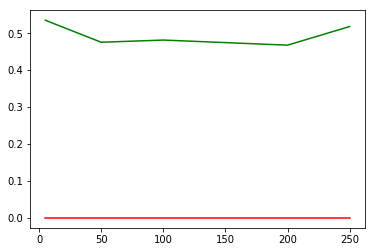

Working on... NVDA
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.4772234273318872
0.47071583514

0.5206073752711496
0.5097613882863341
0.47288503253796094
0.5661605206073753
0.4750542299349241
0.5227765726681128
--------------
0.4924078091106291
0.4945770065075922
0.4967462039045553
0.4837310195227766
0.5206073752711496
0.5054229934924078
--------------
0.49023861171366595
0.46637744034707157
0.5032537960954447
0.4837310195227766
0.5162689804772235
0.48156182212581344
--------------
0.4642082429501085
0.6030368763557483
0.5227765726681128
0.47071583514099785
0.5314533622559653
0.5097613882863341
--------------
0.46637744034707157
0.5986984815618221
0.5227765726681128
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.5227765726681128
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.46637744034707157
0.5986984815618221
0.5227765726681128
0.47071583514099785
0.527114967462039
0.5032537960954447
--------------
0.5509761388286334
0.5726681127982647
0.5162689804772235
0.49023861171366595
0.5010845986

--------------
0.39956331877729256
0.6855895196506551
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.6855895196506551
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.6855895196506551
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.6855895196506551
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.6855895196506551
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.314410480349345
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.314410480349345
0.3799126637554585
0.5851528384279476
0.5502183406113537
0.5131004366812227
--------------
0.39956331877729256
0.314410480349345
0.3799126637554585
0.5851528384279476
0

0.5851528384279476
0.5502183406113537
0.4868995633187773
--------------
0.39956331877729256
0.6855895196506551
0.6200873362445415
0.5851528384279476
0.5502183406113537
0.4868995633187773
--------------
0.4148471615720524
0.49563318777292575
0.4104803493449782
0.4497816593886463
0.49563318777292575
0.5393013100436681
--------------
0.4672489082969432
0.5131004366812227
0.43013100436681223
0.49563318777292575
0.537117903930131
0.49344978165938863
--------------
0.3864628820960699
0.517467248908297
0.4606986899563319
0.5698689956331878
0.5458515283842795
0.4978165938864629
--------------
0.4410480349344978
0.5393013100436681
0.5917030567685589
0.5676855895196506
0.5982532751091703
0.5043668122270742
--------------
0.47161572052401746
0.5131004366812227
0.6375545851528385
0.5327510917030568
0.5829694323144105
0.5393013100436681
--------------
0.45633187772925765
0.4497816593886463
0.5524017467248908
0.6615720524017468
0.5545851528384279
0.5349344978165939
--------------
0.39956331877729256

0.5220264317180616
--------------
0.3722466960352423
0.12334801762114538
0.7048458149779736
0.4801762114537445
0.5374449339207048
0.5220264317180616
--------------
0.3722466960352423
0.3370044052863436
0.5176211453744494
0.4801762114537445
0.5374449339207048
0.5220264317180616
--------------
0.381057268722467
0.4911894273127753
0.30616740088105726
0.4801762114537445
0.5374449339207048
0.5308370044052864
--------------
0.36123348017621143
0.6497797356828194
0.3392070484581498
0.4713656387665198
0.5418502202643172
0.76431718061674
--------------
0.44713656387665196
0.6387665198237885
0.43392070484581496
0.4669603524229075
0.5572687224669604
0.6189427312775331
--------------
0.32599118942731276
0.6475770925110133
0.5991189427312775
0.6233480176211453
0.6101321585903083
0.5484581497797357
--------------
0.3722466960352423
0.8744493392070485
0.7048458149779736
0.5198237885462555
0.46255506607929514
0.4779735682819383
--------------
0.3722466960352423
0.8766519823788547
0.7048458149779736
0.

0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.06278026905829596
0.31390134529147984
0.4641255605381166
0.4439461883408072
0.4798206278026906
--------------
0.2825112107623318
0.062780269

0.6928251121076233
--------------
0.242152466367713
0.7511210762331838
0.49551569506726456
0.8452914798206278
0.7130044843049327
0.672645739910314
--------------
0.2825112107623318
0.9372197309417041
0.6860986547085202
0.5358744394618834
0.4439461883408072
0.5201793721973094
--------------
0.2825112107623318
0.9372197309417041
0.6860986547085202
0.5358744394618834
0.4439461883408072
0.5201793721973094
--------------
0.2825112107623318
0.9372197309417041
0.6860986547085202
0.5358744394618834
0.4439461883408072
0.5201793721973094
--------------
0.2825112107623318
0.9372197309417041
0.6860986547085202
0.5358744394618834
0.4439461883408072
0.5201793721973094
--------------
0.3452914798206278
0.5650224215246636
0.31614349775784756
0.4641255605381166
0.5605381165919282
0.7017937219730942
--------------
0.3654708520179372
0.6704035874439462
0.3273542600896861
0.4820627802690583
0.5807174887892377
0.726457399103139
--------------
0.3789237668161435
0.7645739910313901
0.33856502242152464
0.5807

0.497737556561086
--------------
0.7420814479638009
0.01809954751131222
0.6968325791855203
0.4479638009049774
0.5339366515837104
0.502262443438914
--------------
0.7420814479638009
0.01809954751131222
0.6968325791855203
0.4479638009049774
0.5339366515837104
0.502262443438914
--------------
0.7420814479638009
0.01809954751131222
0.6968325791855203
0.4479638009049774
0.5339366515837104
0.502262443438914
--------------
0.7420814479638009
0.01809954751131222
0.6968325791855203
0.4479638009049774
0.5339366515837104
0.497737556561086
--------------
0.7420814479638009
0.01809954751131222
0.6968325791855203
0.4479638009049774
0.49547511312217196
0.497737556561086
--------------
0.2579185520361991
0.3914027149321267
0.3031674208144796
0.4479638009049774
0.4660633484162896
0.497737556561086
--------------
0.26018099547511314
0.4321266968325792
0.3031674208144796
0.4479638009049774
0.4660633484162896
0.7805429864253394
--------------
0.3914027149321267
0.832579185520362
0.3009049773755656
0.44796

Window: 250
[[239 178]
 [443 245]]
Vol pos 6.172735622903554
Vol neg 4.823357594187641
F1,score 0.44104410441044106
Accuracy: 0.43800904977375565
[0, 0, 0, 0, 0]
[0.45667244367417675, 0.588646288209607, 0.6, 0.41973094170403585, 0.43800904977375565]
accuracy
accuracy


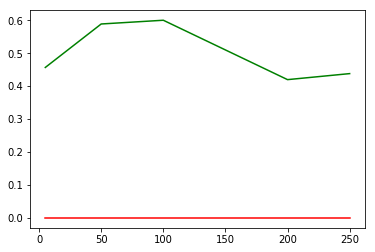

Working on... NFLX
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.43817787418655096
0.4511930585683297
0.4685466377440347
--------------
0.49023861171366595
0.41865509761388287
0.544468546637744
0.4381

0.4360086767895879
--------------
0.48590021691973967
0.44685466377440347
0.49023861171366595
0.4772234273318872
0.5249457700650759
0.44468546637744033
--------------
0.5401301518438177
0.4403470715835141
0.5770065075921909
0.5054229934924078
0.49891540130151846
0.5010845986984815
--------------
0.5574837310195228
0.48590021691973967
0.5509761388286334
0.5184381778741866
0.5075921908893709
0.4750542299349241
--------------
0.5140997830802603
0.4164859002169197
0.5401301518438177
0.5639913232104121
0.5466377440347071
0.45770065075921906
--------------
0.49023861171366595
0.5813449023861171
0.544468546637744
0.561822125813449
0.5488069414316703
0.4685466377440347
--------------
0.49023861171366595
0.5813449023861171
0.544468546637744
0.561822125813449
0.5488069414316703
0.4685466377440347
--------------
0.49023861171366595
0.5813449023861171
0.544468546637744
0.561822125813449
0.5488069414316703
0.4685466377440347
--------------
0.5336225596529284
0.4490238611713666
0.47288503253796094
0

0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.44759825327510916
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.5524017467248908
0.4104803493449782
--------------
0.4890829694323144
0.7096069868995634
0.3930131004366812
0.6004366812227074
0.5524017467248908
0.4104803493449782
--------------


0.5524017467248908
0.5895196506550219
--------------
0.5109170305676856
0.7096069868995634
0.6069868995633187
0.6004366812227074
0.5524017467248908
0.5895196506550219
--------------
0.5109170305676856
0.7096069868995634
0.6069868995633187
0.6004366812227074
0.5524017467248908
0.5895196506550219
--------------
0.5305676855895196
0.43231441048034935
0.5021834061135371
0.4017467248908297
0.49563318777292575
0.5087336244541485
--------------
0.5218340611353712
0.45414847161572053
0.5218340611353712
0.43231441048034935
0.4847161572052402
0.537117903930131
--------------
0.5829694323144105
0.4410480349344978
0.5436681222707423
0.4781659388646288
0.43231441048034935
0.4606986899563319
--------------
0.6244541484716157
0.4585152838427948
0.5895196506550219
0.49563318777292575
0.45633187772925765
0.425764192139738
--------------
0.5698689956331878
0.4868995633187773
0.5938864628820961
0.5349344978165939
0.5589519650655022
0.45633187772925765
--------------
0.5873362445414847
0.4279475982532751


0.43832599118942733
0.751101321585903
0.31938325991189426
0.33259911894273125
0.5991189427312775
0.7026431718061674
--------------
0.5616740088105727
0.751101321585903
0.6806167400881057
0.33259911894273125
0.5991189427312775
0.7026431718061674
--------------
0.513215859030837
0.4118942731277533
0.43171806167400884
0.42070484581497797
0.5484581497797357
0.2973568281938326
--------------
0.526431718061674
0.3832599118942731
0.3590308370044053
0.32819383259911894
0.5726872246696035
0.2907488986784141
--------------
0.5748898678414097
0.44052863436123346
0.35462555066079293
0.32158590308370044
0.5837004405286343
0.34140969162995594
--------------
0.5352422907488987
0.5154185022026432
0.42951541850220265
0.3524229074889868
0.4713656387665198
0.5991189427312775
--------------
0.5616740088105727
0.5176211453744494
0.43832599118942733
0.3898678414096916
0.32819383259911894
0.5484581497797357
--------------
0.5638766519823789
0.751101321585903
0.6806167400881057
0.6674008810572687
0.4008810572

0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.21524663677130046
0.1860986547085202
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.2152466367713004

0.7309417040358744
--------------
0.5896860986547086
0.3632286995515695
0.289237668161435
0.34080717488789236
0.6591928251121076
0.6973094170403588
--------------
0.5672645739910314
0.437219730941704
0.34977578475336324
0.49327354260089684
0.3789237668161435
0.8295964125560538
--------------
0.35201793721973096
0.7690582959641256
0.7847533632286996
0.8139013452914798
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.7847533632286996
0.8139013452914798
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.7847533632286996
0.8139013452914798
0.4551569506726457
0.625560538116592
--------------
0.33856502242152464
0.8766816143497758
0.7847533632286996
0.8139013452914798
0.4551569506726457
0.625560538116592
--------------
0.6748878923766816
0.21973094170403587
0.21748878923766815
0.24663677130044842
0.6748878923766816
0.7690582959641256
--------------
0.6838565022421524
0.2040358744394619
0.23094170403587444
0

0.6583710407239819
0.5316742081447964
0.6402714932126696
--------------
0.3597285067873303
0.05656108597285068
0.8484162895927602
0.8280542986425339
0.4683257918552036
0.4502262443438914
--------------
0.3597285067873303
0.05656108597285068
0.8484162895927602
0.8280542986425339
0.4683257918552036
0.4502262443438914
--------------
0.3597285067873303
0.05656108597285068
0.8484162895927602
0.8280542986425339
0.4683257918552036
0.4502262443438914
--------------
0.3597285067873303
0.05656108597285068
0.8484162895927602
0.8280542986425339
0.4683257918552036
0.4502262443438914
--------------
0.3597285067873303
0.05656108597285068
0.1515837104072398
0.17194570135746606
0.4683257918552036
0.4502262443438914
--------------
0.3597285067873303
0.05656108597285068
0.1515837104072398
0.17194570135746606
0.4683257918552036
0.4502262443438914
--------------
0.5475113122171946
0.39592760180995473
0.16515837104072398
0.17194570135746606
0.46153846153846156
0.45248868778280543
--------------
0.6515837104

0.5316742081447964
0.5497737556561086
--------------
0.3597285067873303
0.9434389140271493
0.8484162895927602
0.8280542986425339
0.5316742081447964
0.5497737556561086
--------------
Diff in tren train and test
0.6427601809954752
0.8206521739130435
Window: 250
[[  0 198]
 [  0 906]]
Vol pos 6.02503034488764
Vol neg 4.111861770232235
F1,score 0.9014925373134328
Accuracy: 0.8206521739130435
[0, 0, 0, 0, 0]
[0.5368603642671292, 0.6442307692307693, 0.6834215167548501, 0.7890484739676841, 0.8206521739130435]
accuracy
accuracy


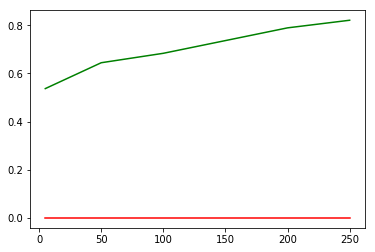

Working on... BKNG
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058139534883721
0.5
0.46511627906976744
0.48255813953488375
--------------
0.4883720930232558
0.46511627906976744
0.5058

0.4418604651162791
0.5988372093023255
0.4418604651162791
0.5465116279069767
0.5232558139534884
--------------
0.5116279069767442
0.47674418604651164
0.5058139534883721
0.5523255813953488
0.45930232558139533
0.5058139534883721
--------------
0.45930232558139533
0.4941860465116279
0.563953488372093
0.563953488372093
0.5174418604651163
0.5406976744186046
--------------
0.47674418604651164
0.5697674418604651
0.4883720930232558
0.6162790697674418
0.5
0.563953488372093
--------------
0.48255813953488375
0.5523255813953488
0.48255813953488375
0.5174418604651163
0.5523255813953488
0.43023255813953487
--------------
0.46511627906976744
0.5174418604651163
0.47674418604651164
0.5290697674418605
0.5116279069767442
0.48255813953488375
--------------
0.4883720930232558
0.5
0.5465116279069767
0.5348837209302325
0.45930232558139533
0.46511627906976744
--------------
0.4883720930232558
0.5348837209302325
0.5058139534883721
0.5
0.46511627906976744
0.5174418604651163
--------------
0.4883720930232558
0.5

0.6488095238095238
0.4226190476190476
0.5238095238095238
--------------
0.27380952380952384
0.5178571428571429
0.4107142857142857
0.48214285714285715
0.5119047619047619
0.48214285714285715
--------------
0.3333333333333333
0.5892857142857143
0.40476190476190477
0.6428571428571429
0.4226190476190476
0.5238095238095238
--------------
0.3333333333333333
0.5892857142857143
0.40476190476190477
0.6488095238095238
0.4226190476190476
0.5238095238095238
--------------
0.3333333333333333
0.5892857142857143
0.40476190476190477
0.6488095238095238
0.4226190476190476
0.5238095238095238
--------------
0.3333333333333333
0.5892857142857143
0.40476190476190477
0.6488095238095238
0.4226190476190476
0.5238095238095238
--------------
0.3333333333333333
0.5892857142857143
0.40476190476190477
0.6488095238095238
0.4226190476190476
0.5238095238095238
--------------
0.3333333333333333
0.4107142857142857
0.40476190476190477
0.35119047619047616
0.5773809523809523
0.5238095238095238
--------------
0.3333333333333

0.5892857142857143
0.5952380952380952
0.35119047619047616
0.4226190476190476
0.5238095238095238
--------------
0.6666666666666666
0.5892857142857143
0.5952380952380952
0.35119047619047616
0.4226190476190476
0.5238095238095238
--------------
Diff in tren train and test
0.5174866627148785
0.5938242280285035
Window: 50
[[122  49]
 [166  84]]
Vol pos 0.7190220377617128
Vol neg 0.5355299328727964
F1,score 0.4386422976501306
Accuracy: 0.48931116389548696
0.8597560975609756
0.6036585365853658
0.35365853658536583
0.39634146341463417
0.4695121951219512
0.3719512195121951
--------------
0.8597560975609756
0.6036585365853658
0.35365853658536583
0.39634146341463417
0.4695121951219512
0.3719512195121951
--------------
0.8597560975609756
0.6036585365853658
0.35365853658536583
0.39634146341463417
0.4695121951219512
0.3719512195121951
--------------
0.8597560975609756
0.6036585365853658
0.35365853658536583
0.39634146341463417
0.4695121951219512
0.3719512195121951
--------------
0.8597560975609756
0.60

0.6036585365853658
0.5304878048780488
0.6280487804878049
--------------
0.40853658536585363
0.36585365853658536
0.5853658536585366
0.2621951219512195
0.4695121951219512
0.3719512195121951
--------------
0.32926829268292684
0.3048780487804878
0.5426829268292683
0.25609756097560976
0.7073170731707317
0.5548780487804879
--------------
0.7012195121951219
0.6585365853658537
0.5914634146341463
0.4146341463414634
0.7987804878048781
0.6280487804878049
--------------
0.7926829268292683
0.725609756097561
0.5548780487804879
0.40853658536585363
0.8292682926829268
0.6097560975609756
--------------
0.7987804878048781
0.8292682926829268
0.6036585365853658
0.4146341463414634
0.8048780487804879
0.6280487804878049
--------------
0.5670731707317073
0.6524390243902439
0.7195121951219512
0.4329268292682927
0.75
0.6280487804878049
--------------
0.1402439024390244
0.5914634146341463
0.6585365853658537
0.573170731707317
0.5426829268292683
0.6280487804878049
--------------
0.1402439024390244
0.603658536585365

0.16666666666666666
0.2692307692307692
--------------
1.0
0.46794871794871795
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
1.0
0.46794871794871795
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
1.0
0.46794871794871795
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
1.0
0.46794871794871795
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
1.0
0.46794871794871795
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
0.0
0.532051282051282
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
0.0
0.532051282051282
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
0.0
0.532051282051282
0.7371794871794872
0.5192307692307693
0.16666666666666666
0.2692307692307692
--------------
0.0641025641025641
0.519

0.7307692307692307
--------------
0.8397435897435898
0.6923076923076923
0.358974358974359
0.6794871794871795
0.8653846153846154
0.7051282051282052
--------------
0.7948717948717948
0.7307692307692307
0.358974358974359
0.6410256410256411
0.7948717948717948
0.6730769230769231
--------------
0.5641025641025641
0.7371794871794872
0.33974358974358976
0.75
0.7307692307692307
0.5641025641025641
--------------
0.0
0.5448717948717948
0.7307692307692307
0.5192307692307693
0.1858974358974359
0.7051282051282052
--------------
0.0
0.532051282051282
0.7371794871794872
0.4807692307692308
0.16666666666666666
0.7307692307692307
--------------
0.0
0.532051282051282
0.7371794871794872
0.4807692307692308
0.16666666666666666
0.7307692307692307
--------------
0.0
0.532051282051282
0.7371794871794872
0.4807692307692308
0.16666666666666666
0.7307692307692307
--------------
Diff in tren train and test
0.5322271857051691
0.7058823529411765
Window: 200
[[114   1]
 [ 62 214]]
Vol pos 1.5984606380629132
Vol neg 0.

0.0
0.08552631578947369
--------------
0.3026315789473684
0.3684210526315789
0.4934210526315789
0.5789473684210527
0.8289473684210527
0.28289473684210525
--------------
0.47368421052631576
0.4605263157894737
0.42105263157894735
0.6710526315789473
0.881578947368421
0.6973684210526315
--------------
0.881578947368421
0.6052631578947368
0.35526315789473684
0.9276315789473685
0.9605263157894737
0.9407894736842105
--------------
0.9013157894736842
0.4276315789473684
0.28289473684210525
0.9407894736842105
0.9605263157894737
0.9078947368421053
--------------
0.8355263157894737
0.40789473684210525
0.4144736842105263
0.7894736842105263
0.875
0.9013157894736842
--------------
0.6578947368421053
0.4144736842105263
0.4934210526315789
0.631578947368421
0.6842105263157895
0.8355263157894737
--------------
0.019736842105263157
0.6776315789473685
0.7368421052631579
0.3881578947368421
0.039473684210526314
0.19736842105263158
--------------
0.019736842105263157
0.7039473684210527
0.7236842105263158
0.38

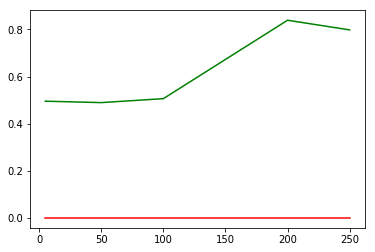

Working on... ADBE
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403470715835141
0.45770065075921906
0.5010845986984815
--------------
0.5097613882863341
0.39913232104121477
0.5292841648590022
0.4403

0.4772234273318872
0.4642082429501085
0.5488069414316703
0.46203904555314534
--------------
0.5466377440347071
0.4750542299349241
0.4924078091106291
0.49023861171366595
0.5704989154013015
0.4880694143167028
--------------
0.5227765726681128
0.5119305856832972
0.5140997830802603
0.46637744034707157
0.5075921908893709
0.43817787418655096
--------------
0.4837310195227766
0.5119305856832972
0.5336225596529284
0.46637744034707157
0.5054229934924078
0.45770065075921906
--------------
0.5097613882863341
0.6095444685466378
0.5314533622559653
0.5488069414316703
0.5401301518438177
0.5010845986984815
--------------
0.5097613882863341
0.6008676789587852
0.5292841648590022
0.559652928416486
0.5422993492407809
0.49891540130151846
--------------
0.5097613882863341
0.6008676789587852
0.5292841648590022
0.559652928416486
0.5422993492407809
0.49891540130151846
--------------
0.5097613882863341
0.6008676789587852
0.5292841648590022
0.559652928416486
0.5422993492407809
0.49891540130151846
--------------


0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.35152838427947597
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.35152838427947597
0.6724890829694323
0.5567685589519651
--------------
0.38427947598253276
0.28602620087336245
0.39082969432314413
0.35152838427947597
0.6724890829694323
0.5567685589519651
--------------
0.6157205240174672
0.7139737991266376
0.39082969432314413
0.35152838427947597
0.6724890829694323
0.5567685589519651
--------------
0.6157

0.6462882096069869
0.6724890829694323
0.5567685589519651
--------------
0.6157205240174672
0.7139737991266376
0.6091703056768559
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.6157205240174672
0.7139737991266376
0.6091703056768559
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.6157205240174672
0.7139737991266376
0.6091703056768559
0.648471615720524
0.6724890829694323
0.5567685589519651
--------------
0.5633187772925764
0.29475982532751094
0.6375545851528385
0.3231441048034934
0.5545851528384279
0.5327510917030568
--------------
0.519650655021834
0.3231441048034934
0.5917030567685589
0.33406113537117904
0.4890829694323144
0.5829694323144105
--------------
0.6157205240174672
0.3406113537117904
0.5698689956331878
0.3318777292576419
0.39956331877729256
0.49344978165938863
--------------
0.5851528384279476
0.28820960698689957
0.6135371179039302
0.43013100436681223
0.4148471615720524
0.6004366812227074
--------------
0.5698689956331878
0.40

0.32599118942731276
0.7048458149779736
--------------
0.5881057268722467
0.28193832599118945
0.6475770925110133
0.34140969162995594
0.32599118942731276
0.7048458149779736
--------------
0.5881057268722467
0.28193832599118945
0.6475770925110133
0.34140969162995594
0.32599118942731276
0.7048458149779736
--------------
0.5881057268722467
0.7180616740088106
0.6475770925110133
0.6585903083700441
0.6740088105726872
0.29515418502202645
--------------
0.5374449339207048
0.5
0.5947136563876652
0.34801762114537443
0.5484581497797357
0.2973568281938326
--------------
0.5418502202643172
0.5462555066079295
0.5881057268722467
0.40308370044052866
0.31277533039647576
0.2973568281938326
--------------
0.526431718061674
0.5110132158590308
0.6453744493392071
0.3832599118942731
0.3392070484581498
0.3502202643171806
--------------
0.5374449339207048
0.5044052863436124
0.5572687224669604
0.3634361233480176
0.33259911894273125
0.5418502202643172
--------------
0.5814977973568282
0.6167400881057269
0.50881057

0.22869955156950672
0.8565022421524664
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251121076233
0.7511210762331838
0.3452914798206278
0.7713004484304933
0.14349775784753363
0.33408071748878926
--------------
0.6928251

0.3654708520179372
0.24663677130044842
0.18834080717488788
0.6704035874439462
--------------
0.5067264573991032
0.3004484304932735
0.4013452914798206
0.26681614349775784
0.3744394618834081
0.6748878923766816
--------------
0.32062780269058294
0.4260089686098655
0.452914798206278
0.2937219730941704
0.4103139013452915
0.6883408071748879
--------------
0.32062780269058294
0.5
0.4798206278026906
0.45067264573991034
0.7713004484304933
0.672645739910314
--------------
0.3071748878923767
0.7466367713004485
0.6524663677130045
0.7713004484304933
0.8565022421524664
0.6659192825112108
--------------
0.3071748878923767
0.7511210762331838
0.6547085201793722
0.7713004484304933
0.8565022421524664
0.6659192825112108
--------------
0.3071748878923767
0.7511210762331838
0.6547085201793722
0.7713004484304933
0.8565022421524664
0.6659192825112108
--------------
0.3071748878923767
0.7511210762331838
0.6547085201793722
0.7713004484304933
0.8565022421524664
0.6659192825112108
--------------
0.526905829596412

0.2647058823529412
0.39819004524886875
0.2579185520361991
0.24434389140271492
0.5723981900452488
--------------
0.26244343891402716
0.3257918552036199
0.39819004524886875
0.19683257918552036
0.2081447963800905
0.6402714932126696
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.19683257918552036
0.18552036199095023
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.19683257918552036
0.18552036199095023
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.19683257918552036
0.18552036199095023
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.19683257918552036
0.18552036199095023
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.8031674208144797
0.8144796380090498
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.8031674208144797
0.8144796380090498
0.66515

0.26244343891402716
0.8122171945701357
0.6832579185520362
0.8031674208144797
0.8144796380090498
0.665158371040724
--------------
0.26244343891402716
0.8122171945701357
0.6832579185520362
0.8031674208144797
0.8144796380090498
0.665158371040724
--------------
Diff in tren train and test
0.720814479638009
0.755656108597285
Window: 250
[[270   0]
 [835   0]]
Vol pos 2.203734941427059
Vol neg 4.102303418331434
F1,score 0.0
Accuracy: 0.24434389140271492
[0, 0, 0, 0, 0]
[0.548526863084922, 0.651528384279476, 0.6405286343612335, 0.726457399103139, 0.24434389140271492]
accuracy
accuracy


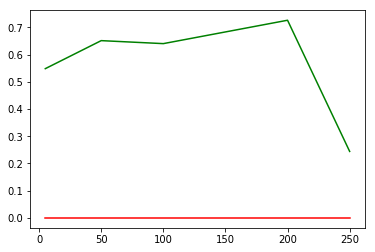

Working on... AMGN
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.5574837310195228
0.5379609544468547
0.5119305856832972
--------------
0.5032537960954447
0.47071583514099785
0.5206073752711496
0.55748373101

0.4685466377440347
0.47288503253796094
--------------
0.5119305856832972
0.5119305856832972
0.4598698481561822
0.5184381778741866
0.47288503253796094
0.4750542299349241
--------------
0.45770065075921906
0.5314533622559653
0.45770065075921906
0.5509761388286334
0.4924078091106291
0.5379609544468547
--------------
0.4403470715835141
0.5466377440347071
0.4403470715835141
0.5184381778741866
0.5206073752711496
0.5422993492407809
--------------
0.49023861171366595
0.5661605206073753
0.5184381778741866
0.5357917570498916
0.46203904555314534
0.4924078091106291
--------------
0.5032537960954447
0.5292841648590022
0.5206073752711496
0.5574837310195228
0.46203904555314534
0.4880694143167028
--------------
0.5032537960954447
0.5292841648590022
0.5206073752711496
0.5574837310195228
0.46203904555314534
0.4880694143167028
--------------
0.5032537960954447
0.5292841648590022
0.5206073752711496
0.5574837310195228
0.46203904555314534
0.4880694143167028
--------------
0.5422993492407809
0.50108459869848

0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.4039301310043668
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------------
0.62882096069869
0.4279475982532751
0.4039301310043668
0.5458515283842795
0.42139737991266374
0.5393013100436681
--------

0.5960698689956332
0.5458515283842795
0.42139737991266374
0.4606986899563319
--------------
0.37117903930131
0.4279475982532751
0.5960698689956332
0.5458515283842795
0.42139737991266374
0.4606986899563319
--------------
0.6179039301310044
0.519650655021834
0.4192139737991266
0.5764192139737991
0.5021834061135371
0.4672489082969432
--------------
0.6266375545851528
0.5
0.40611353711790393
0.6048034934497817
0.5545851528384279
0.4868995633187773
--------------
0.6462882096069869
0.4650655021834061
0.40829694323144106
0.5458515283842795
0.5218340611353712
0.4606986899563319
--------------
0.6703056768558951
0.44759825327510916
0.4519650655021834
0.5087336244541485
0.5480349344978166
0.4912663755458515
--------------
0.6244541484716157
0.43013100436681223
0.49563318777292575
0.5524017467248908
0.4978165938864629
0.5305676855895196
--------------
0.6353711790393013
0.4344978165938865
0.37336244541484714
0.5393013100436681
0.5458515283842795
0.48034934497816595
--------------
0.3733624454148

0.3700440528634361
0.6409691629955947
0.4118942731277533
0.5726872246696035
0.41409691629955947
--------------
0.46916299559471364
0.48237885462555063
0.34801762114537443
0.4581497797356828
0.4647577092511013
0.6960352422907489
--------------
0.6674008810572687
0.45374449339207046
0.3700440528634361
0.4845814977973568
0.5484581497797357
0.6541850220264317
--------------
0.6453744493392071
0.4889867841409692
0.3854625550660793
0.44933920704845814
0.566079295154185
0.6519823788546255
--------------
0.6387665198237885
0.526431718061674
0.33259911894273125
0.42951541850220265
0.539647577092511
0.6277533039647577
--------------
0.6079295154185022
0.4955947136563877
0.31057268722466963
0.460352422907489
0.5991189427312775
0.48237885462555063
--------------
0.34801762114537443
0.3832599118942731
0.6013215859030837
0.5881057268722467
0.42731277533039647
0.566079295154185
--------------
0.35462555066079293
0.3700440528634361
0.6409691629955947
0.5881057268722467
0.42731277533039647
0.5859030837

0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995515695067265
0.6524663677130045
0.4641255605381166
--------------
0.8228699551569507
0.7399103139013453
0.5717488789237668
0.6995

0.49551569506726456
0.4484304932735426
0.4439461883408072
0.600896860986547
0.5358744394618834
--------------
0.17713004484304934
0.2645739910313901
0.46860986547085204
0.6681614349775785
0.3475336322869955
0.5381165919282511
--------------
0.17713004484304934
0.2600896860986547
0.5717488789237668
0.6995515695067265
0.3475336322869955
0.5358744394618834
--------------
0.17713004484304934
0.2600896860986547
0.5717488789237668
0.6995515695067265
0.3475336322869955
0.5358744394618834
--------------
0.17713004484304934
0.2600896860986547
0.5717488789237668
0.6995515695067265
0.3475336322869955
0.5358744394618834
--------------
0.7242152466367713
0.6390134529147982
0.43946188340807174
0.3834080717488789
0.6659192825112108
0.7331838565022422
--------------
0.7309417040358744
0.6636771300448431
0.452914798206278
0.3811659192825112
0.6591928251121076
0.7219730941704036
--------------
0.7511210762331838
0.6659192825112108
0.4730941704035874
0.3744394618834081
0.6390134529147982
0.71524663677130

0.5248868778280543
0.6945701357466063
0.5995475113122172
0.5475113122171946
--------------
0.7873303167420814
0.755656108597285
0.5248868778280543
0.6945701357466063
0.5995475113122172
0.5475113122171946
--------------
0.7873303167420814
0.755656108597285
0.5248868778280543
0.6945701357466063
0.5995475113122172
0.5475113122171946
--------------
0.7873303167420814
0.755656108597285
0.4751131221719457
0.6945701357466063
0.4004524886877828
0.5475113122171946
--------------
0.7873303167420814
0.755656108597285
0.4751131221719457
0.6945701357466063
0.4004524886877828
0.5475113122171946
--------------
0.2647058823529412
0.39592760180995473
0.5294117647058824
0.8122171945701357
0.6108597285067874
0.6742081447963801
--------------
0.7239819004524887
0.7375565610859729
0.5203619909502263
0.38235294117647056
0.5995475113122172
0.7714932126696833
--------------
0.748868778280543
0.7398190045248869
0.5090497737556561
0.3597285067873303
0.5995475113122172
0.7714932126696833
--------------
0.6764705

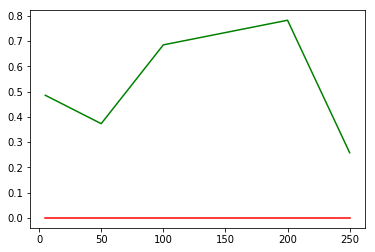

Working on... TXN
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.46203904555314534
0.5401301518438177
0.47071583514099785
--------------
0.5184381778741866
0.351409978308026
0.45770065075921906
0.462039

0.455531453362256
0.47071583514099785
0.45770065075921906
0.5206073752711496
0.5119305856832972
--------------
0.4793926247288503
0.40997830802603036
0.4924078091106291
0.5075921908893709
0.4837310195227766
0.4750542299349241
--------------
0.4837310195227766
0.5010845986984815
0.49023861171366595
0.5466377440347071
0.4837310195227766
0.45770065075921906
--------------
0.5162689804772235
0.648590021691974
0.5422993492407809
0.5379609544468547
0.5401301518438177
0.5292841648590022
--------------
0.5184381778741866
0.648590021691974
0.5422993492407809
0.5379609544468547
0.5401301518438177
0.5292841648590022
--------------
0.5184381778741866
0.648590021691974
0.5422993492407809
0.5379609544468547
0.5401301518438177
0.5292841648590022
--------------
0.5184381778741866
0.648590021691974
0.5422993492407809
0.5379609544468547
0.5401301518438177
0.5292841648590022
--------------
0.544468546637744
0.5140997830802603
0.4750542299349241
0.5357917570498916
0.5075921908893709
0.5292841648590022
---

0.5524017467248908
0.44541484716157204
0.49344978165938863
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.35807860262008734
0.19868995633187772
0.4672489082969432
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.

0.44541484716157204
0.4847161572052402
--------------
0.6419213973799127
0.8013100436681223
0.5327510917030568
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.6419213973799127
0.8013100436681223
0.5327510917030568
0.5524017467248908
0.44541484716157204
0.4847161572052402
--------------
0.519650655021834
0.32532751091703055
0.5851528384279476
0.537117903930131
0.6004366812227074
0.5436681222707423
--------------
0.5240174672489083
0.27510917030567683
0.5655021834061136
0.5633187772925764
0.574235807860262
0.5829694323144105
--------------
0.4410480349344978
0.20087336244541484
0.5262008733624454
0.48034934497816595
0.5414847161572053
0.6069868995633187
--------------
0.48253275109170307
0.2292576419213974
0.5676855895196506
0.4497816593886463
0.5349344978165939
0.5021834061135371
--------------
0.4737991266375546
0.27074235807860264
0.6244541484716157
0.4781659388646288
0.48034934497816595
0.517467248908297
--------------
0.5349344978165939
0.4410480349344978


0.9162995594713657
0.5925110132158591
0.3898678414096916
0.6057268722466961
0.5220264317180616
--------------
0.6674008810572687
0.9162995594713657
0.5925110132158591
0.3898678414096916
0.6057268722466961
0.5
--------------
0.6409691629955947
0.8193832599118943
0.3502202643171806
0.40308370044052866
0.6057268722466961
0.5220264317180616
--------------
0.552863436123348
0.10792951541850221
0.2488986784140969
0.3898678414096916
0.6057268722466961
0.5220264317180616
--------------
0.5440528634361234
0.1145374449339207
0.28634361233480177
0.43832599118942733
0.5969162995594713
0.6784140969162996
--------------
0.5286343612334802
0.09030837004405286
0.42070484581497797
0.5220264317180616
0.4889867841409692
0.5616740088105727
--------------
0.6211453744493393
0.36784140969163
0.394273127753304
0.5440528634361234
0.41409691629955947
0.5242290748898678
--------------
0.6674008810572687
0.9162995594713657
0.40748898678414097
0.6101321585903083
0.394273127753304
0.4779735682819383
--------------

0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.4304932735426009
1.0
0.289237668161435
0.6883408071748879
0.5538116591928252
0.3542600896860987
--------------
0.5695067264573991
1.0
0.7107623318385651
0.6883408071748879
0.4461883408071749
0.6457399103139013
--------------
0.5695067264573991
1.0
0.7107623318385651


0.2242152466367713
0.8026905829596412
0.6300448430493274
0.5807174887892377
--------------
0.7600896860986547
0.026905829596412557
0.2399103139013453
0.625560538116592
0.4730941704035874
0.5582959641255605
--------------
0.7107623318385651
0.08520179372197309
0.2802690582959641
0.7556053811659192
0.4304932735426009
0.49327354260089684
--------------
0.6771300448430493
0.3004484304932735
0.289237668161435
0.7443946188340808
0.45964125560538116
0.4260089686098655
--------------
0.5695067264573991
1.0
0.289237668161435
0.6883408071748879
0.4461883408071749
0.3542600896860987
--------------
0.5695067264573991
1.0
0.289237668161435
0.6883408071748879
0.4461883408071749
0.3542600896860987
--------------
0.5695067264573991
1.0
0.289237668161435
0.6883408071748879
0.4461883408071749
0.3542600896860987
--------------
0.5695067264573991
1.0
0.289237668161435
0.6883408071748879
0.4461883408071749
0.3542600896860987
--------------
0.7286995515695067
0.020179372197309416
0.3183856502242152
0.701793

1.0
0.6221719457013575
0.3212669683257919
0.4298642533936652
0.6493212669683258
--------------
0.5271493212669683
0.05656108597285068
0.5497737556561086
0.3212669683257919
0.4298642533936652
0.6493212669683258
--------------
0.5429864253393665
0.0
0.5203619909502263
0.41402714932126694
0.4298642533936652
0.7714932126696833
--------------
0.5950226244343891
0.011312217194570135
0.38235294117647056
0.7692307692307693
0.5633484162895928
0.6606334841628959
--------------
0.6357466063348416
0.06787330316742081
0.2579185520361991
0.6923076923076923
0.497737556561086
0.5972850678733032
--------------
0.583710407239819
0.4117647058823529
0.3778280542986425
0.7149321266968326
0.5271493212669683
0.38235294117647056
--------------
0.5452488687782805
1.0
0.3778280542986425
0.6787330316742082
0.5701357466063348
0.3506787330316742
--------------
0.5452488687782805
1.0
0.3778280542986425
0.6787330316742082
0.5701357466063348
0.3506787330316742
--------------
0.5452488687782805
1.0
0.3778280542986425


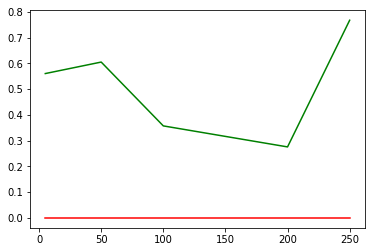

Working on... AVGO
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.542299349240

--------------
0.5140997830802603
0.4880694143167028
0.41865509761388287
0.4967462039045553
0.48590021691973967
0.47288503253796094
--------------
0.5422993492407809
0.5075921908893709
0.45770065075921906
0.5140997830802603
0.47288503253796094
0.527114967462039
--------------
0.5184381778741866
0.5357917570498916
0.44251626898047725
0.527114967462039
0.49023861171366595
0.5574837310195228
--------------
0.5206073752711496
0.5531453362255966
0.44685466377440347
0.5314533622559653
0.4945770065075922
0.48590021691973967
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5184381778741866
0.5553145336225597
0.4490238611713666
0.5422993492407809
0.5075921908893709
0.47071583514099785
--------------
0.5206073752711496
0.4924078091106291
0.45770065075921906
0.462039045553

0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152838427947598
0.3406113537117904
0.6091703056768559
0.49563318777292575
0.5676855895196506
--------------
0.462882096069869
0.5152

--------------
0.462882096069869
0.4847161572052402
0.6593886462882096
0.39082969432314413
0.5043668122270742
0.43231441048034935
--------------
0.462882096069869
0.4847161572052402
0.6593886462882096
0.39082969432314413
0.5043668122270742
0.43231441048034935
--------------
0.44541484716157204
0.5982532751091703
0.6091703056768559
0.38209606986899564
0.6179039301310044
0.5698689956331878
--------------
0.4104803493449782
0.5262008733624454
0.5917030567685589
0.4017467248908297
0.5938864628820961
0.5676855895196506
--------------
0.3951965065502183
0.43013100436681223
0.44759825327510916
0.47161572052401746
0.5218340611353712
0.6200873362445415
--------------
0.43231441048034935
0.40611353711790393
0.48034934497816595
0.5720524017467249
0.4978165938864629
0.6200873362445415
--------------
0.4432314410480349
0.4781659388646288
0.4912663755458515
0.4781659388646288
0.46943231441048033
0.6048034934497817
--------------
0.4497816593886463
0.5087336244541485
0.4039301310043668
0.403930131004

0.48237885462555063
0.47577092511013214
0.473568281938326
0.3898678414096916
0.5418502202643172
0.5704845814977973
--------------
0.36784140969163
0.48237885462555063
0.2621145374449339
0.32158590308370044
0.460352422907489
0.5550660792951542
--------------
0.36784140969163
0.48237885462555063
0.2709251101321586
0.3392070484581498
0.5
0.552863436123348
--------------
0.36784140969163
0.48237885462555063
0.2709251101321586
0.3392070484581498
0.5
0.552863436123348
--------------
0.36784140969163
0.48237885462555063
0.2709251101321586
0.3392070484581498
0.5
0.552863436123348
--------------
0.42070484581497797
0.44713656387665196
0.30616740088105726
0.566079295154185
0.6938325991189427
0.5991189427312775
--------------
0.48237885462555063
0.552863436123348
0.6145374449339207
0.6277533039647577
0.8061674008810573
0.5682819383259912
--------------
0.5
0.6872246696035242
0.6233480176211453
0.44933920704845814
0.7907488986784141
0.5814977973568282
--------------
0.552863436123348
0.56607929515

0.6681614349775785
0.6457399103139013
0.484304932735426
--------------
0.7017937219730942
0.4170403587443946
0.9484304932735426
0.6681614349775785
0.3542600896860987
0.515695067264574
--------------
0.7017937219730942
0.4170403587443946
0.9484304932735426
0.6681614349775785
0.3542600896860987
0.515695067264574
--------------
0.7017937219730942
0.4170403587443946
0.9484304932735426
0.6681614349775785
0.3542600896860987
0.515695067264574
--------------
0.7017937219730942
0.4170403587443946


KeyboardInterrupt: 

In [3]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5,50,100,200,250]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
    

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight='balanced')
                    #x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    prediction=rbf_svm.predict(x_val)
                    #if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                     #   x_val,y_val=smote(x_val,y_val)
                    #else:
                     #   totu=totu+1
                        
                    print(rbf_svm.score(x_val,y_val))
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                print('--------------')
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg,class_weight='balanced')
        #x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [ ]:
 """"
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                        print('unable to balance')
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                """"

In [ ]:
tempacc=accstocksresults

In [ ]:
print(tempacc)

In [ ]:
import operator
t=[0,0,0]
for i in range(0,len(tempacc)):
    t=np.add(t,tempacc[i])
print(t)
print(t/len(tempacc))


In [ ]:
aapl=[0.5213675213675214, 0.5327635327635327, 0.5242165242165242, 0.5278174037089871, 0.5228571428571429, 0.5444126074498568, 0.5589080459770115, 0.5662824207492796, 0.5433526011560693, 0.5130434782608696, 0.5985401459854015, 0.5226939970717424, 0.5338235294117647, 0.5353982300884956, 0.47703703703703704, 0.4157973174366617, 0.4041916167664671, 0.44511278195488724, 0.48338368580060426, 0.5128983308042488, 0.6131498470948012, 0.6129032258064516, 0.6003110419906688, 0.627172195892575, 0.5826645264847512]
adbe=[0.5498575498575499, 0.5698005698005698, 0.5783475783475783, 0.6077032810271041, 0.6442857142857142, 0.6575931232091691, 0.6752873563218391, 0.6772334293948127, 0.6734104046242775, 0.6652173913043479, 0.6802919708029197, 0.6881405563689604, 0.7147058823529412, 0.7684365781710915, 0.7911111111111111, 0.8002980625931445, 0.7754491017964071, 0.7894736842105263, 0.8187311178247734, 0.8634294385432474, 0.8929663608562691, 0.9139784946236559, 0.9891135303265941, 0.9936808846761453, 1.0]
adi=[0.5227920227920227, 0.5313390313390314, 0.550641940085592, 0.5414285714285715, 0.542203147353362, 0.6002865329512894, 0.5905172413793104, 0.5922190201729106, 0.6005788712011577, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.5436746987951807, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.5514018691588785, 0.7215189873417721, 0.6270096463022508]
googl=[0.5014245014245015, 0.5213675213675214, 0.5292439372325249, 0.5378031383737518, 0.5665236051502146, 0.5702005730659025, 0.5933908045977011, 0.6123919308357348, 0.5672937771345875, 0.5761973875181422, 0.6262773722627737, 0.6310395314787701, 0.5985294117647059, 0.5634218289085545, 0.5170370370370371, 0.47242921013412814, 0.48353293413173654, 0.48270676691729325, 0.49244712990936557, 0.496206373292868, 0.4954128440366973, 0.5407066052227343, 0.671850699844479, 0.6524486571879937, 0.6725521669341894]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()